In [1]:
!pip install -q kaggle
import json

data = {"username":"tunkedsaro","key":"ff3d00dc680ff94caf6f8d4d9bcd3168"}
json_data = json.dumps(data)

# Write the JSON string to a file
file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c license-plate-recognition

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           7016        129  1.0              
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           22MB  2024-06-14 19:10:56             96        344  1.0              
rashadrmammadov/heart-disease-prediction                             Heart Disease prediction                          16KB  2024-06-12 07:29:56            760         23  1.0              
monisamir/global-salary-analysis                  

In [2]:
!unzip /content/license-plate-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: 1-LPR-950/1-LPR-950/1/License_00647.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00648.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00649.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00650.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00651.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00652.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00653.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00654.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00655.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00656.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00657.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00658.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00659.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00660.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00661.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00662.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00663.jpg  
  inflating: 1

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
test_df = pd.read_csv("/content/test.csv")
test_df

,image_id,x1,y1,x2,y2
0,4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4,333.014354,205.741627,394.497608,238.277512
1,2678e665-50a9-42eb-8b98-3a1323a8950d,293.574297,201.867470,358.634538,235.200803
2,1b3bee82-898d-4aa8-9a7e-6f375ad62d8f,306.425703,204.277108,362.248996,227.168675
3,6d997bce-395e-4d25-85e4-dec70ead7954,332.530120,199.056225,397.991968,228.775100
4,59c765b1-cdac-4fa7-902c-685f1591decf,312.466844,160.477454,378.779841,193.103448
...,...,...,...,...,...
1695,1c766e55-3096-4814-8c23-7cb8facc0e36,326.506024,205.481928,380.321285,237.208835
1696,98e8495a-e51d-494f-951d-739a93d87777,311.962963,201.308642,374.308642,232.790123
1697,935248b8-1fe9-4cc3-8894-007bd715d309,305.790123,204.395062,371.839506,236.493827
1698,df48b54b-8e63-4484-85f1-99a6c97e92f4,328.012346,215.506173,389.740741,247.604938


In [5]:
submit_df = pd.read_csv("/content/submission.csv")
submit_df

,image_id,label
0,4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4,0ฬ-0674
1,2678e665-50a9-42eb-8b98-3a1323a8950d,05กฒ4901
2,1b3bee82-898d-4aa8-9a7e-6f375ad62d8f,1กฉ9661
3,6d997bce-395e-4d25-85e4-dec70ead7954,NaN
4,59c765b1-cdac-4fa7-902c-685f1591decf,NaN
...,...,...
1695,1c766e55-3096-4814-8c23-7cb8facc0e36,NaN
1696,98e8495a-e51d-494f-951d-739a93d87777,NaN
1697,935248b8-1fe9-4cc3-8894-007bd715d309,NaN
1698,df48b54b-8e63-4484-85f1-99a6c97e92f4,NaN


In [6]:
len(os.listdir("/content/test/test"))

1700

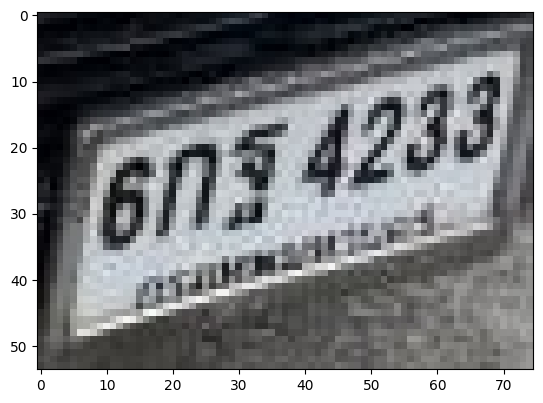

In [7]:
img = plt.imread("/content/1-LPR-950/1-LPR-950/1/License_00002.jpg")
plt.imshow(img)

In [8]:
def txtread(txtpath):
    with open(txtpath) as f:
        lines = f.readlines()
    print(lines)

In [9]:
with open("/content/1-LPR-950/1-LPR-950/1/labels/License_00002.txt") as f:
    lines = f.readlines()
lines

['6 0.16 0.546292 0.133336 0.425925\n',
 '4 0.56 0.39815 0.16 0.35185\n',
 '2 0.666672 0.314817 0.106664 0.370367\n',
 '3 0.773336 0.305558 0.106664 0.314817\n',
 '3 0.873336 0.277775 0.12 0.333333\n',
 '10 0.28 0.490742 0.106664 0.388892\n',
 '25 0.433336 0.4537 0.146664 0.35185\n',
 '54 0.52 0.638892 0.693336 0.240742\n']

In [10]:
def image_w_box(pm1:str,pm2:str):
    """
    pm1 : image path str
    pm2 : yolo labels path str
    """
    # Load the image
    img = plt.imread(pm1)
    print(img.shape)
    # Path to the annotation file
    annotation_img = pm2
    # Read the YOLO annotations from the file
    with open(annotation_img, 'r') as file:
        yolo_annotations = file.readlines()
    # Plot the image
    fig, ax = plt.subplots()
    ax.imshow(img)
    # Function to convert YOLO format to bounding box coordinates
    def yolo_to_bbox(yolo_annotation, img_width, img_height):
        class_label, x_center, y_center, width, height = map(float, yolo_annotation.split())
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        return x_min, y_min, width, height, int(class_label)
    # Get image dimensions
    img_height, img_width = img.shape[:2]

    # Plot each bounding box and label
    for annotation in yolo_annotations:
        x_min, y_min, width, height, class_label = yolo_to_bbox(annotation, img_width, img_height)
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min-5, y_min - 5, str(class_label), color='white', fontsize=12, backgroundcolor='red')

    plt.show()

## ภาพและlabel จาก 1-LPR-950

(51, 142, 3)


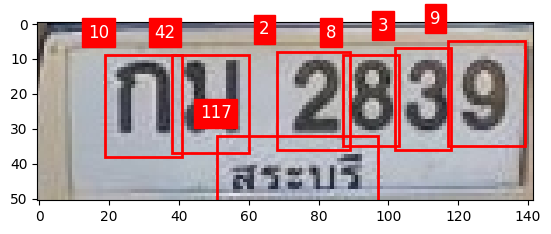

In [11]:
img_path_name = f'/content/1-LPR-950/1-LPR-950/1/License_00003.jpg'
ano_path_name = "/content/1-LPR-950/1-LPR-950/1/labels/License_00003.txt"

image_w_box(img_path_name,ano_path_name)

In [12]:
with open(ano_path_name, 'r') as file:
    yolo_annotations = file.readlines()
yolo_annotations

['117 0.521123 0.843133 0.323945 0.431366\n',
 '10 0.211265 0.460788 0.154931 0.568622\n',
 '42 0.34507 0.450981 0.154931 0.549023\n',
 '2 0.552813 0.431366 0.147887 0.549023\n',
 '8 0.669011 0.431366 0.112677 0.509809\n',
 '3 0.774644 0.421574 0.112677 0.568622\n',
 '9 0.901405 0.392152 0.154931 0.588236\n']

## ภาพและlabel จาก 2-LPR-950

(56, 107, 3)


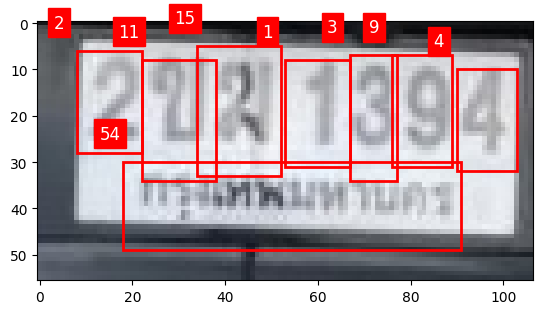

In [13]:
img_path_name = f'/content/2-LRP-950/2-LRP-950/2/License_00951.jpg'
ano_path_name = "/content/2-LRP-950/2-LRP-950/2/labels/License_00951.txt"

image_w_box(img_path_name,ano_path_name)

In [14]:
with open("/content/lp_classes.txt") as f:
    lines = f.readlines()
ipclass = [i.replace("\n","") for i in lines]
ipdict = {}
for idx,i in enumerate(ipclass):
    ipdict[idx] = i

In [15]:
ipdict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'ก',
 11: 'ข',
 12: 'ฃ',
 13: 'ค',
 14: 'ฅ',
 15: 'ฆ',
 16: 'ง',
 17: 'จ',
 18: 'ฉ',
 19: 'ช',
 20: 'ซ',
 21: 'ฌ',
 22: 'ญ',
 23: 'ฎ',
 24: 'ฏ',
 25: 'ฐ',
 26: 'ฑ',
 27: 'ฒ',
 28: 'ณ',
 29: 'ด',
 30: 'ต',
 31: 'ถ',
 32: 'ท',
 33: 'ธ',
 34: 'น',
 35: 'บ',
 36: 'ป',
 37: 'ผ',
 38: 'ฝ',
 39: 'พ',
 40: 'ฟ',
 41: 'ภ',
 42: 'ม',
 43: 'ย',
 44: 'ร',
 45: 'ล',
 46: 'ว',
 47: 'ศ',
 48: 'ษ',
 49: 'ส',
 50: 'ห',
 51: 'ฬ',
 52: 'อ',
 53: 'ฮ',
 54: 'กรุงเทพมหานคร',
 55: 'กระบี่',
 56: 'กาญจนบุรี',
 57: 'กาฬสินธุ์',
 58: 'กำแพงเพชร',
 59: 'ขอนแก่น',
 60: 'จันทบุรี',
 61: 'ฉะเชิงเทรา',
 62: 'ชลบุรี',
 63: 'ชัยนาท',
 64: 'ชัยภูมิ',
 65: 'ชุมพร',
 66: 'เชียงราย',
 67: 'เชียงใหม่',
 68: 'ตรัง',
 69: 'ตราด',
 70: 'ตาก',
 71: 'นครนายก',
 72: 'นครปฐม',
 73: 'นครพนม',
 74: 'นครราชสีมา',
 75: 'นครศรีธรรมราช',
 76: 'นครสวรรค์',
 77: 'นนทบุรี',
 78: 'นราธิวาส',
 79: 'น่าน',
 80: 'บึงกาฬ',
 81: 'บุรีรัมย์',
 82: 'ปทุม

# Test Data

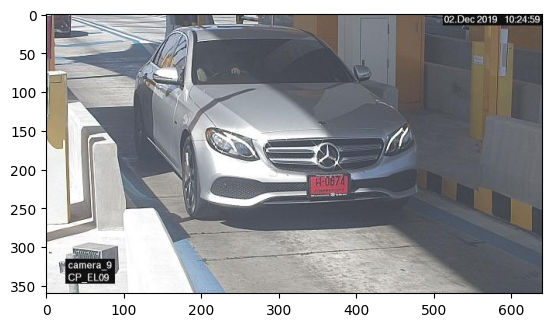

In [16]:
img = plt.imread("/content/test/test/4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4.jpg")
plt.imshow(img)

In [17]:
test_df.iloc[0].values[0]

'4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4'

In [18]:
img_name = test_df.iloc[0].values[0]
x1 = int(test_df.iloc[0].values[1])
y1 = int(test_df.iloc[0].values[2])
x2 = int(test_df.iloc[0].values[3])
y2 = int(test_df.iloc[0].values[4])
print(f"{img_name} {x1} {y1} {x2} {y2}")

4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4 333 205 394 238


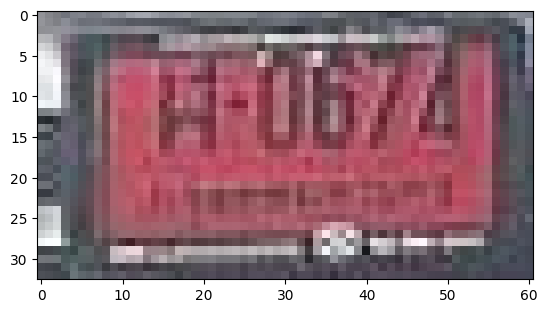

In [19]:
# /content/test/test/0008f18b-bbde-4cc5-92a3-b8a340484eab.jpg
# "/content/test/test/"+img_name+'.jpg'
img = plt.imread("/content/test/test/"+img_name+'.jpg')
plt.imshow(img[y1:y2,x1:x2])


<hr>

# Create Folder

In [20]:
import os

# Define the folder structure
folder_structure = {
    "YOLOData": {
        "simages": {
            "images": {},
            "labels": {}
        },
        "result": {},
        "train": {
            "images": {},
            "labels": {},
        },
        "val": {
            "images": {},
            "labels": {},
        },
    }
}

def create_folders(base_path, structure):
    for name, substructure in structure.items():
        folder_path = os.path.join(base_path, name)
        if substructure is None:
            # If substructure is None, create a file
            open(folder_path, 'a').close()
        else:
            # Otherwise, create a directory and recurse
            os.makedirs(folder_path, exist_ok=True)
            create_folders(folder_path, substructure)

# Create the folder structure in Colab
base_path = "/content"
create_folders(base_path, folder_structure)

print("Folder structure created successfully!")

Folder structure created successfully!


In [21]:
import shutil

In [22]:
# copy label file -> simages
labelpath1 = "/content/1-LPR-950/1-LPR-950/1/labels"
for i in os.listdir(labelpath1):
    labelname = labelpath1+'/'+i
    # print(labelname)
    shutil.copy(labelname,"/content/YOLOData/simages/labels")
    # break
labelpath2 = "/content/2-LRP-950/2-LRP-950/2/labels"
for i in os.listdir(labelpath2):
    labelname = labelpath2+'/'+i
    # print(labelname)
    shutil.copy(labelname,"/content/YOLOData/simages/labels")
    # break

In [23]:
imgpath1 = "/content/1-LPR-950/1-LPR-950/1"
for i in os.listdir(imgpath1):
    imgname = imgpath1 + '/' + i
    if os.path.isdir(imgname): # if is dir
        continue
    else:
        # print(imgpath1+'/'+i)
        shutil.copy(imgname,"/content/YOLOData/simages/images")
    # break
imgpath2 = "/content/2-LRP-950/2-LRP-950/2"
for i in os.listdir(imgpath2):
    imgname = imgpath2 + '/' + i
    if os.path.isdir(imgname): # if is dir
        continue
    else:
        # print(imgpath2+'/'+i)
        shutil.copy(imgname,"/content/YOLOData/simages/images")
    # break

<hr>

In [24]:
imgpd = os.listdir("/content/YOLOData/simages/images")
imgpd

['License_00222.jpg',
 'License_00905.jpg',
 'License_01660.jpg',
 'License_00278.jpg',
 'License_00816.jpg',
 'License_00311.jpg',
 'License_00402.jpg',
 'License_00766.jpg',
 'License_00761.jpg',
 'License_00616.jpg',
 'License_01663.jpg',
 'License_01445.jpg',
 'License_00387.jpg',
 'License_01592.jpg',
 'License_00428.jpg',
 'License_01213.jpg',
 'License_00867.jpg',
 'License_00654.jpg',
 'License_00728.jpg',
 'License_01719.jpg',
 'License_00221.jpg',
 'License_01759.jpg',
 'License_00256.jpg',
 'License_00289.jpg',
 'License_00655.jpg',
 'License_00090.jpg',
 'License_00298.jpg',
 'License_00158.jpg',
 'License_00581.jpg',
 'License_00522.jpg',
 'License_01627.jpg',
 'License_00192.jpg',
 'License_01414.jpg',
 'License_01349.jpg',
 'License_01144.jpg',
 'License_01221.jpg',
 'License_00988.jpg',
 'License_00694.jpg',
 'License_01482.jpg',
 'License_01824.jpg',
 'License_01650.jpg',
 'License_00698.jpg',
 'License_00363.jpg',
 'License_00059.jpg',
 'License_01147.jpg',
 'License_

In [25]:
df = pd.DataFrame(imgpd, columns=['column_name'])
df

,column_name
0,License_00222.jpg
1,License_00905.jpg
2,License_01660.jpg
3,License_00278.jpg
4,License_00816.jpg
...,...
1966,License_01550.jpg
1967,License_01795.jpg
1968,License_00407.jpg
1969,License_00685.jpg


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Split the DataFrame into train and validation sets
train_df, val_df = train_test_split(df, test_size=0.01, random_state=42)


# Print the sizes of the split datasets
print(f"Training set size: {train_df.shape[0]}")
print(f"Validation set size: {val_df.shape[0]}")

Training set size: 1951
Validation set size: 20


In [28]:
# /content/YOLOData/simages/images/License_00001.jpg
# /content/YOLOData/simages/labels/License_00001.txt
for i in list(train_df['column_name']):
    idname = i.split(".")[0]
    imgpath = "/content/YOLOData/simages/images/"+idname+'.jpg'
    nonpath = "/content/YOLOData/simages/labels/"+idname+'.txt'
    # print(imgpath,nonpath)
    try:
        shutil.copy(imgpath,"/content/YOLOData/train/images")
        shutil.copy(nonpath,"/content/YOLOData/train/labels")
    except:
        continue
    # break

for i in list(val_df['column_name']):
    idname = i.split(".")[0]
    imgpath = "/content/YOLOData/simages/images/"+idname+'.jpg'
    nonpath = "/content/YOLOData/simages/labels/"+idname+'.txt'
    # print(imgpath,nonpath)
    try:
        shutil.copy(imgpath,"/content/YOLOData/val/images")
        shutil.copy(nonpath,"/content/YOLOData/val/labels")
    except:
        continue
    # break

In [29]:
print(len(os.listdir("/content/YOLOData/train/images")))
print(len(os.listdir("/content/YOLOData/train/labels")))

1951
1931


In [30]:
print(len(os.listdir("/content/YOLOData/val/images")))
print(len(os.listdir("/content/YOLOData/val/labels")))

20
20


<hr>

# YOLO

In [31]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [32]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 70.8 MB/s eta 0:00:00


In [33]:
!mkdir -p {HOME}/weights
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 100M
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt


In [34]:
with open("/content/lp_classes.txt") as f:
    lines = f.readlines()
ipclass = [i.replace("\n","") for i in lines]
# ipdict = {}
# for idx,i in enumerate(ipclass):
#     ipdict[idx] = i
ipclass

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'ก',
 'ข',
 'ฃ',
 'ค',
 'ฅ',
 'ฆ',
 'ง',
 'จ',
 'ฉ',
 'ช',
 'ซ',
 'ฌ',
 'ญ',
 'ฎ',
 'ฏ',
 'ฐ',
 'ฑ',
 'ฒ',
 'ณ',
 'ด',
 'ต',
 'ถ',
 'ท',
 'ธ',
 'น',
 'บ',
 'ป',
 'ผ',
 'ฝ',
 'พ',
 'ฟ',
 'ภ',
 'ม',
 'ย',
 'ร',
 'ล',
 'ว',
 'ศ',
 'ษ',
 'ส',
 'ห',
 'ฬ',
 'อ',
 'ฮ',
 'กรุงเทพมหานคร',
 'กระบี่',
 'กาญจนบุรี',
 'กาฬสินธุ์',
 'กำแพงเพชร',
 'ขอนแก่น',
 'จันทบุรี',
 'ฉะเชิงเทรา',
 'ชลบุรี',
 'ชัยนาท',
 'ชัยภูมิ',
 'ชุมพร',
 'เชียงราย',
 'เชียงใหม่',
 'ตรัง',
 'ตราด',
 'ตาก',
 'นครนายก',
 'นครปฐม',
 'นครพนม',
 'นครราชสีมา',
 'นครศรีธรรมราช',
 'นครสวรรค์',
 'นนทบุรี',
 'นราธิวาส',
 'น่าน',
 'บึงกาฬ',
 'บุรีรัมย์',
 'ปทุมธานี',
 'ประจวบคีรีขันธ์',
 'ปราจีนบุรี',
 'ปัตตานี',
 'พระนครศรีอยุธยา',
 'พังงา',
 'พัทลุง',
 'พิจิตร',
 'พิษณุโลก',
 'เพชรบุรี',
 'เพชรบูรณ์',
 'แพร่',
 'พะเยา',
 'ภูเก็ต',
 'มหาสารคาม',
 'มุกดาหาร',
 'แม่ฮ่องสอน',
 'ยะลา',
 'ยโสธร',
 'ร้อยเอ็ด',
 'ระนอง',
 'ระยอง',
 'ราชบุรี',
 'ลพบุรี',
 'ลำปาง',
 'ลำพูน',
 'เลย',
 

In [35]:
print(len(ipclass))

131


In [36]:
# Set the paths
data_path = "/content/YOLOData/data.yaml"      # เขียนเฉพาะ ไฟล์ที่มี image, labels ไม่ครบไม่ต้องใส่
model_path = "/content/weights/yolov10l.pt"
save_dir = "/content/YOLOData/result"

In [37]:
# train: /content/YOLOData/train/images
# val: /content/YOLOData/val/images

# nc: 131
# names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'ก', 'ข', 'ฃ', 'ค', 'ฅ', 'ฆ', 'ง', 'จ', 'ฉ', 'ช', 'ซ', 'ฌ', 'ญ', 'ฎ', 'ฏ', 'ฐ', 'ฑ', 'ฒ', 'ณ', 'ด', 'ต', 'ถ', 'ท', 'ธ', 'น', 'บ', 'ป', 'ผ', 'ฝ', 'พ', 'ฟ', 'ภ', 'ม', 'ย', 'ร', 'ล', 'ว', 'ศ', 'ษ', 'ส', 'ห', 'ฬ', 'อ', 'ฮ', 'กรุงเทพมหานคร', 'กระบี่', 'กาญจนบุรี', 'กาฬสินธุ์', 'กำแพงเพชร', 'ขอนแก่น', 'จันทบุรี', 'ฉะเชิงเทรา', 'ชลบุรี', 'ชัยนาท', 'ชัยภูมิ', 'ชุมพร', 'เชียงราย', 'เชียงใหม่', 'ตรัง', 'ตราด', 'ตาก', 'นครนายก', 'นครปฐม', 'นครพนม', 'นครราชสีมา', 'นครศรีธรรมราช', 'นครสวรรค์', 'นนทบุรี', 'นราธิวาส', 'น่าน', 'บึงกาฬ', 'บุรีรัมย์', 'ปทุมธานี', 'ประจวบคีรีขันธ์', 'ปราจีนบุรี', 'ปัตตานี', 'พระนครศรีอยุธยา', 'พังงา', 'พัทลุง', 'พิจิตร', 'พิษณุโลก', 'เพชรบุรี', 'เพชรบูรณ์', 'แพร่', 'พะเยา', 'ภูเก็ต', 'มหาสารคาม', 'มุกดาหาร', 'แม่ฮ่องสอน', 'ยะลา', 'ยโสธร', 'ร้อยเอ็ด', 'ระนอง', 'ระยอง', 'ราชบุรี', 'ลพบุรี', 'ลำปาง', 'ลำพูน', 'เลย', 'ศรีสะเกษ', 'สกลนคร', 'สงขลา', 'สตูล', 'สมุทรปราการ', 'สมุทรสงคราม', 'สมุทรสาคร', 'สระแก้ว', 'สระบุรี', 'สิงห์บุรี', 'สุโขทัย', 'สุพรรณบุรี', 'สุราษฎร์ธานี', 'สุรินทร์', 'หนองคาย', 'หนองบัวลำภู', 'อ่างทอง', 'อุดรธานี', 'อุทัยธานี', 'อุตรดิตถ์', 'อุบลราชธานี', 'อำนาจเจริญ']

# degrees: 0.15  # image rotation (+/- deg)
# translate: 0.1  # image translation (+/- fraction)
# scale: 0.2  # image scale (+/- gain)
# shear: 0.2  # image shear (+/- deg) from -0.5 to 0.5
# perspective: 0.1  # image perspective (+/- fraction), range 0-0.001
# flipud: 0.5  # image flip up-down (probability)
# fliplr: 0.5  # image flip left-right (probability)
# mosaic: 0.3  # image mosaic (probability)
# mixup: 0.1  # image mixup (probability)

In [38]:
from ultralytics import YOLOv10

In [39]:
model = YOLOv10(model_path)

In [41]:
model.train(
    data=data_path,
    epochs=50, # 50
    batch=40,  # A100 32 ได้
    save_dir=save_dir
)

New https://pypi.org/project/ultralytics/8.2.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10l.pt, data=/content/YOLOData/data.yaml, epochs=50, time=None, patience=100, batch=40, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

100%|██████████| 22.2M/22.2M [00:00<00:00, 449MB/s]


Overriding model.yaml nc=80 with nc=131

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1    137728  ultralytics.nn.modules.block.SCDown          [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1    268800  ultralyti

100%|██████████| 6.23M/6.23M [00:00<00:00, 382MB/s]


AMP: checks passed ✅


train: Scanning /content/YOLOData/train/labels... 1931 images, 20 backgrounds, 23 corrupt: 100%|██████████| 1951/1951 [00:01<00:00, 1343.62it/s]

train: WARNING ⚠️ /content/YOLOData/train/images/License_00072.jpg: ignoring corrupt image/label: negative label values [    -2.8782     -8.5111     -3.2115     -9.0222     -3.0705     -9.0667      -2.891     -9.0556     -2.4231     -8.9556     -2.7308     -8.9778     -2.5769     -8.9889]
train: WARNING ⚠️ /content/YOLOData/train/images/License_00076.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.5941      7.1875      3.2588      6.9688      3.4294      6.9609      3.5765      6.9375      3.9353      6.9531         3.7      6.9766      3.8059      6.9609]
train: WARNING ⚠️ /content/YOLOData/train/images/License_00084.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      7.663      7.8478      8.1087      8.1087        8.25      8.3804]
train: WARNING ⚠️ /content/YOLOData/train/images/License_00085.jpg: ignoring corrupt image/label: negative label values [    -6.0351     -6.3772     -6.3772     -6.3947     -6.3947  

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/YOLOData/val/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 1269.17it/s]

val: New cache created: /content/YOLOData/val/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=7.4e-05, momentum=0.9) with parameter groups 167 weight(decay=0.0), 180 weight(decay=0.000625), 179 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/50      35.7G      2.945      5.828       3.17      2.612      7.093      2.828        615        640:  10%|█         | 5/49 [00:03<00:25,  1.69it/s]

       1/50      35.7G      2.932      5.828       3.15       2.59       7.09       2.81        623        640:  16%|█▋        | 8/49 [00:04<00:21,  1.94it/s]
100%|██████████| 755k/755k [00:00<00:00, 86.6MB/s]
       1/50      35.8G      2.207      4.425       2.34      1.967      5.653      2.122         99        640: 100%|██████████| 49/49 [00:29<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         20        151      0.668      0.138      0.164       0.08



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/50        36G      1.843      1.615      1.859      1.747      2.648      1.785        132        640: 100%|██████████| 49/49 [00:24<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


                   all         20        151      0.791      0.443       0.55      0.229

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       3/50      35.2G        1.8      1.179      1.834      1.767      1.773      1.818        165        640: 100%|██████████| 49/49 [00:23<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


                   all         20        151      0.749       0.74      0.828      0.407

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       4/50      35.1G      1.798      1.053       1.85      1.782      1.481      1.846        101        640: 100%|██████████| 49/49 [00:23<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


                   all         20        151       0.68      0.756      0.809      0.376

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       5/50      35.2G      1.755     0.9844      1.811      1.747       1.32      1.807        102        640: 100%|██████████| 49/49 [00:23<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


                   all         20        151      0.861       0.79      0.886       0.45

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       6/50      35.2G      1.738     0.9363      1.791      1.734        1.2      1.794        161        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


                   all         20        151      0.796       0.82      0.886      0.449

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       7/50      35.2G      1.746     0.8955      1.801       1.75       1.11      1.808         99        640: 100%|██████████| 49/49 [00:23<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


                   all         20        151      0.808      0.782      0.902      0.439

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       8/50      35.2G      1.709     0.8856      1.779      1.714      1.086      1.786        114        640: 100%|██████████| 49/49 [00:23<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]


                   all         20        151      0.783      0.896       0.91       0.46

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       9/50      35.1G      1.691     0.8681      1.779      1.688      1.058      1.781        130        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


                   all         20        151      0.856      0.796      0.905      0.486

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      10/50      35.2G      1.685      0.848      1.779      1.693      1.014      1.785         85        640: 100%|██████████| 49/49 [00:22<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


                   all         20        151      0.844      0.843      0.916      0.465

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      11/50      35.2G       1.68      0.833      1.772      1.683     0.9904      1.781        117        640: 100%|██████████| 49/49 [00:23<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


                   all         20        151       0.87      0.805      0.879      0.446

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      12/50      35.1G      1.649     0.8057      1.748      1.655     0.9393      1.752        110        640: 100%|██████████| 49/49 [00:22<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


                   all         20        151      0.855      0.835      0.922      0.452

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      13/50      35.2G      1.641     0.8047      1.729       1.65     0.9341      1.736        143        640: 100%|██████████| 49/49 [00:22<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]


                   all         20        151      0.841      0.848      0.929      0.481

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      14/50        36G      1.623     0.7857      1.722      1.629     0.9193      1.727        132        640: 100%|██████████| 49/49 [00:23<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all         20        151      0.915      0.803      0.926        0.5

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      15/50      35.1G      1.626     0.7754      1.723      1.632     0.9032      1.727        127        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


                   all         20        151      0.862      0.807      0.927      0.473

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      16/50      35.2G      1.596     0.7484      1.695      1.606     0.8596      1.703        143        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


                   all         20        151      0.895      0.824      0.913      0.474

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      17/50      35.2G      1.592     0.7428      1.699      1.598     0.8563        1.7        112        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


                   all         20        151      0.847      0.856      0.946      0.491

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      18/50      35.2G      1.571     0.7245      1.695       1.58     0.8294      1.699        128        640: 100%|██████████| 49/49 [00:22<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


                   all         20        151      0.868      0.797      0.946      0.519

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      19/50      35.2G      1.558     0.7219       1.69      1.566     0.8249      1.692        152        640: 100%|██████████| 49/49 [00:23<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


                   all         20        151      0.903      0.827       0.91      0.478

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      20/50      35.2G      1.528     0.7084      1.673      1.538     0.8145      1.678        115        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]


                   all         20        151      0.891      0.829      0.912      0.457

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      21/50      35.2G      1.521     0.7032      1.658      1.532     0.8045      1.662        131        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]


                   all         20        151      0.877      0.837       0.95       0.49

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      22/50      35.1G      1.507     0.6937       1.66      1.513      0.794      1.662        148        640: 100%|██████████| 49/49 [00:22<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]


                   all         20        151      0.924      0.834      0.941      0.496

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      23/50      35.1G      1.479     0.6683       1.63       1.49     0.7562      1.636         85        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


                   all         20        151      0.907      0.837      0.974      0.495

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      24/50      35.2G      1.467     0.6719      1.631      1.483     0.7551      1.634        132        640: 100%|██████████| 49/49 [00:22<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


                   all         20        151       0.83      0.892      0.968      0.498

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      25/50      35.2G      1.452     0.6663      1.611      1.464     0.7601      1.615        125        640: 100%|██████████| 49/49 [00:22<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


                   all         20        151      0.821      0.889      0.919      0.459

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      26/50      35.1G      1.433     0.6529      1.601      1.448     0.7449      1.606        105        640: 100%|██████████| 49/49 [00:22<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]


                   all         20        151      0.835      0.897      0.936      0.449

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      27/50      35.2G      1.405     0.6413      1.591      1.418     0.7289      1.593         82        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


                   all         20        151      0.898      0.834      0.923      0.458

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      28/50      35.2G      1.401      0.639      1.596      1.417     0.7293      1.602         94        640: 100%|██████████| 49/49 [00:22<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


                   all         20        151      0.847       0.88      0.935      0.477

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      29/50      35.2G      1.379     0.6293      1.574      1.397     0.7131      1.582        135        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


                   all         20        151      0.834      0.915      0.924      0.451

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      30/50      35.1G      1.348     0.6178       1.55      1.368     0.6988      1.558        128        640: 100%|██████████| 49/49 [00:22<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


                   all         20        151      0.888      0.858      0.931      0.454

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      31/50      35.1G      1.337     0.6119       1.54      1.356     0.6876      1.548        145        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]


                   all         20        151      0.903      0.906      0.932      0.453

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      32/50      35.1G      1.303     0.5958      1.503      1.322     0.6778      1.511        112        640: 100%|██████████| 49/49 [00:23<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]


                   all         20        151      0.856      0.888      0.933      0.461

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      33/50      35.2G      1.303     0.5952      1.511      1.322     0.6732      1.519        142        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


                   all         20        151      0.871      0.876      0.964      0.479

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      34/50      35.2G      1.285     0.6003       1.51      1.308     0.6832       1.52         99        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


                   all         20        151      0.843      0.825      0.908      0.468

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      35/50      35.2G      1.259     0.5875      1.502      1.278     0.6641      1.513         91        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


                   all         20        151      0.802      0.925      0.933       0.44

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      36/50      35.2G      1.252     0.5847      1.495      1.273     0.6668      1.506        108        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


                   all         20        151      0.769      0.925      0.912      0.462

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      37/50      35.2G       1.22     0.5714      1.467      1.243     0.6448      1.478         91        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]


                   all         20        151      0.826      0.912      0.916       0.45

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      38/50      35.2G      1.204     0.5597      1.445      1.224      0.636      1.455        144        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


                   all         20        151      0.776      0.933      0.926      0.451

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      39/50      35.2G      1.188     0.5506       1.43       1.21     0.6247      1.442        121        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


                   all         20        151      0.903      0.824      0.901      0.455

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      40/50      35.2G      1.175     0.5507      1.423      1.199     0.6303      1.434        105        640: 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


                   all         20        151      0.893      0.849      0.919      0.448
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      41/50        35G      1.179     0.4226      1.496      1.195     0.4141      1.514         61        640: 100%|██████████| 49/49 [00:25<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


                   all         20        151       0.79      0.893      0.906      0.458

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      42/50      35.1G      1.124     0.3988       1.46      1.139     0.3811       1.48         60        640: 100%|██████████| 49/49 [00:22<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


                   all         20        151       0.86      0.888      0.929      0.465

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      43/50        35G      1.111     0.3955      1.448      1.125     0.3793      1.467         60        640: 100%|██████████| 49/49 [00:22<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]


                   all         20        151      0.901      0.813      0.905      0.445

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      44/50        35G      1.085     0.3871      1.427      1.097      0.372      1.444         58        640: 100%|██████████| 49/49 [00:22<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


                   all         20        151      0.817       0.89      0.905      0.442

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      45/50        35G      1.061     0.3802        1.4      1.076     0.3626      1.417         62        640: 100%|██████████| 49/49 [00:22<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


                   all         20        151      0.853      0.886      0.913      0.445

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      46/50      35.8G       1.04     0.3753        1.4      1.054     0.3588      1.419         60        640: 100%|██████████| 49/49 [00:22<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


                   all         20        151      0.852      0.841      0.909      0.437

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      47/50        35G      1.028     0.3744      1.388      1.043     0.3595      1.409         59        640: 100%|██████████| 49/49 [00:22<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]


                   all         20        151      0.836      0.878      0.905      0.434

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      48/50        35G       1.01     0.3654      1.365      1.022     0.3464      1.383         58        640: 100%|██████████| 49/49 [00:22<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]


                   all         20        151      0.826      0.896       0.94      0.462

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      49/50        35G      1.006     0.3642      1.374      1.021     0.3459      1.395         56        640: 100%|██████████| 49/49 [00:22<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


                   all         20        151      0.864      0.826      0.908      0.449

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      50/50        35G     0.9853     0.3597      1.358          1     0.3434      1.375         61        640: 100%|██████████| 49/49 [00:22<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


                   all         20        151      0.891      0.814      0.913      0.444

50 epochs completed in 0.397 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv10l summary (fused): 461 layers, 25918370 parameters, 0 gradients, 127.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


                   all         20        151      0.868      0.797      0.945      0.519
                     0         20          5      0.779      0.718      0.866      0.322
                     1         20         10      0.889      0.798       0.84      0.399
                     2         20          9          1      0.934      0.995      0.585
                     3         20          8      0.865          1      0.995       0.43
                     4         20         12          1      0.643      0.891      0.474
                     5         20         10      0.959          1      0.995      0.529
                     6         20         11      0.914          1      0.995      0.451
                     7         20         14      0.909       0.71      0.868      0.388
                     8         20          7          1      0.773      0.995      0.467
                     9         20          7      0.941          1      0.995      0.542
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 15, 16, 18, 19, 21, 25, 27, 29, 31, 32, 34, 41, 45, 51, 54, 74])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x796066318280>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

<hr>

In [42]:
#Mapping Google Drive to your Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Predict

In [43]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [44]:
submission_csv_path = "/content/submission.csv"
test_img_path       = "/content/test/test"

model_path          = "/content/drive/MyDrive/imagecarlabeldetection2/best.pt"
version             = "0.2.1"

In [ ]:
# model = YOLOv10(model_path)

In [45]:
img_dir = test_img_path
img_dir

'/content/test/test'

In [47]:
df = pd.read_csv(submission_csv_path)
df

,image_id,label
0,4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4,0ฬ-0674
1,2678e665-50a9-42eb-8b98-3a1323a8950d,05กฒ4901
2,1b3bee82-898d-4aa8-9a7e-6f375ad62d8f,1กฉ9661
3,6d997bce-395e-4d25-85e4-dec70ead7954,NaN
4,59c765b1-cdac-4fa7-902c-685f1591decf,NaN
...,...,...
1695,1c766e55-3096-4814-8c23-7cb8facc0e36,NaN
1696,98e8495a-e51d-494f-951d-739a93d87777,NaN
1697,935248b8-1fe9-4cc3-8894-007bd715d309,NaN
1698,df48b54b-8e63-4484-85f1-99a6c97e92f4,NaN


In [93]:
df = pd.read_csv("/content/submission.csv")
broken = []
for idx,row in df[:].iterrows():
    # print(idx,"->",row)
    if pd.isna(row['label'])==False:
        continue
    img_file = str(row['image_id'])
    id = idx
    # print(idx,img_file)
    img_path = f'{img_dir}/{img_file}.jpg'

    img = cv2.imread(img_path)
    img_name = test_df.iloc[id].values[0]      # query data
    # print(img_name)
    x1 = int(test_df.iloc[id].values[1])-10    # add bound
    y1 = int(test_df.iloc[id].values[2])-10    # add bound
    x2 = int(test_df.iloc[id].values[3])+10    # add bound
    y2 = int(test_df.iloc[id].values[4])+10    # add bound
    # print(f"{img_name} {x1} {y1} {x2} {y2}")
    imgcroped = img[y1:y2,x1:x2]
    scaled_image = cv2.resize(imgcroped, None, fx=3, fy=3)
    # Remove noise using a Gaussian filter
    filtered_image2 = cv2.GaussianBlur(scaled_image, (5,5), 0)
    # Create the sharpening kernel
    kernel = np.array([[0, -1, 0],
                        [-1, 5, -1],
                        [0, -1, 0]])
    # Sharpen the image
    sharpened_image = cv2.filter2D(filtered_image2, -1, kernel)
    sharpened_image = cv2.filter2D(sharpened_image, -1, kernel)
    # plt.imshow(imgcroped)
    # plt.show()
    results  = model(source = sharpened_image,
                        conf=0.09)   # Predict image by image
    for result in results:
        if result.boxes:
            boxes  = result.boxes.xyxy.tolist()    # Tensor งงๆ -> [[x1,y1,z1,a1],[x2,y2,z2,a2],...[xn,yn,zn,an]]
            clases = [int(cls) for cls in result.boxes.cls.tolist()]    # [float] -> [int]
            bc = []
            for b,c in zip(boxes,clases):     # keep class and box postion in {}
                bc.append([c,b[0]])
            ls = sorted(bc,key=itemgetter(1))
            q = [i[0] for i in ls]
            result = convert2label(q)
            df.at[idx,'label'] = result
        else:
            df.at[idx,'label'] = ''
            broken.append(idx)

Streaming output truncated to the last 5000 lines.
0: 384x640 1 6, 1 7, 1 8, 2 9s, 1 ก, 1 ท, 1 กรุงเทพมหานคร, 19.4ms
Speed: 1.4ms preprocess, 19.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 0s, 2 4s, 1 5, 1 6, 1 ก, 1 ษ, 1 กรุงเทพมหานคร, 18.5ms
Speed: 1.6ms preprocess, 18.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 4, 1 7, 1 9, 1 ฎ, 1 ภ, 1 กรุงเทพมหานคร, 18.5ms
Speed: 1.4ms preprocess, 18.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 0s, 1 1, 1 5, 2 6s, 1 ก, 1 ฉ, 1 กรุงเทพมหานคร, 19.7ms
Speed: 1.6ms preprocess, 19.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 0s, 1 1, 1 2, 1 5, 1 7, 1 ก, 1 ว, 1 กรุงเทพมหานคร, 18.8ms
Speed: 1.5ms preprocess, 18.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 416x640 1 0, 1 1, 1 3, 1 6, 1 9, 1 ก, 1 ฒ, 1 กรุงเทพมหานคร, 19.5ms
Speed: 1.7ms preprocess, 19.5ms inference, 1.2ms postproce

In [94]:
df

,image_id,label
0,4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4,0ฬ-0674
1,2678e665-50a9-42eb-8b98-3a1323a8950d,05กฒ4901
2,1b3bee82-898d-4aa8-9a7e-6f375ad62d8f,1กฉ9661
3,6d997bce-395e-4d25-85e4-dec70ead7954,0จหห464
4,59c765b1-cdac-4fa7-902c-685f1591decf,0ฌธธ5479
...,...,...
1695,1c766e55-3096-4814-8c23-7cb8facc0e36,01กกก4647
1696,98e8495a-e51d-494f-951d-739a93d87777,0พฬร6677
1697,935248b8-1fe9-4cc3-8894-007bd715d309,02กก6970
1698,df48b54b-8e63-4484-85f1-99a6c97e92f4,04กภ45


In [97]:
import time
version = "0.2.0"
# Format the time as hh:mm
formatted_time = time.strftime("%H.%M", time.localtime())
formatted_time = str(int(formatted_time.split(".")[0])+7)+formatted_time.split(".")[1]
csv_name = f'v.{version}.{formatted_time}.csv'
print(csv_name)
df.to_csv(csv_name,index=False)

v.0.2.0.1412.csv


/content/test/test/4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4.jpg
/content/test/test/4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4.jpg
/content/test/test/4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4.jpg 325 197 402 246


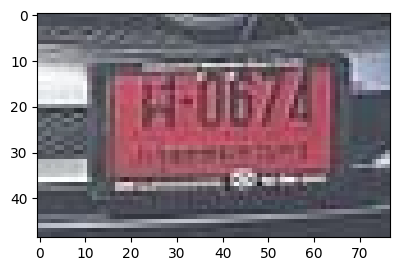


0: 416x640 2 0s, 1 4, 1 6, 1 7, 1 ผ, 20.6ms
Speed: 2.7ms preprocess, 20.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)
[[37.24955368041992, 18.509597778320312, 11.347352981567383, 20.370716094970703], [51.38539505004883, 18.662616729736328, 10.242477416992188, 19.003368377685547], [37.442710876464844, 18.76824188232422, 9.988353729248047, 19.38448143005371], [26.730152130126953, 19.13536262512207, 14.742681503295898, 20.46338653564453], [44.65093231201172, 17.563648223876953, 10.272956848144531, 21.06046485900879], [58.490840911865234, 19.243408203125, 12.275413513183594, 19.694276809692383]]
[0, 7, 0, 37, 6, 4]
0ผ00674
/content/test/test/2678e665-50a9-42eb-8b98-3a1323a8950d.jpg
/content/test/test/2678e665-50a9-42eb-8b98-3a1323a8950d.jpg
/content/test/test/2678e665-50a9-42eb-8b98-3a1323a8950d.jpg 285 193 366 243


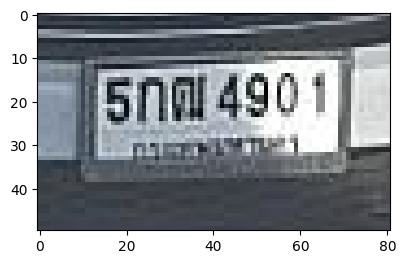


0: 416x640 1 0, 1 1, 1 4, 1 5, 1 9, 1 ก, 1 ฒ, 1 กรุงเทพมหานคร, 18.8ms
Speed: 1.7ms preprocess, 18.8ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
[[35.80827331542969, 18.92165184020996, 13.678121566772461, 20.14251708984375], [66.12821960449219, 18.63604164123535, 12.319374084472656, 20.900455474853516], [27.373741149902344, 19.90525245666504, 13.670812606811523, 19.48682403564453], [44.93106460571289, 18.950143814086914, 11.346855163574219, 20.890098571777344], [58.06859588623047, 18.729148864746094, 10.916950225830078, 19.572032928466797], [17.496646881103516, 19.448474884033203, 14.419323921203613, 20.030170440673828], [40.98420715332031, 32.14250946044922, 50.167327880859375, 13.984161376953125], [51.34355926513672, 19.116329193115234, 10.209449768066406, 19.715110778808594]]
[27, 1, 10, 4, 0, 5, 54, 9]
05กฒ4901
/content/test/test/1b3bee82-898d-4aa8-9a7e-6f375ad62d8f.jpg
/content/test/test/1b3bee82-898d-4aa8-9a7e-6f375ad62d8f.jpg
/content/test/test/1b3bee82-89

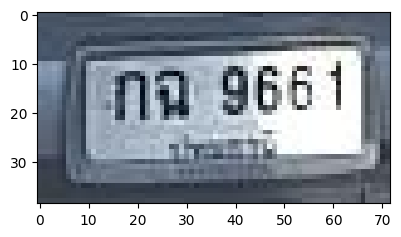


0: 352x640 1 1, 2 6s, 1 9, 1 ก, 1 ฉ, 21.2ms
Speed: 1.6ms preprocess, 21.2ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)
[[28.534732818603516, 15.93253231048584, 12.323698043823242, 18.559057235717773], [62.4439697265625, 14.89799690246582, 11.15909194946289, 19.54589080810547], [40.27485656738281, 15.259252548217773, 10.55221176147461, 19.004154205322266], [47.50395965576172, 15.494830131530762, 9.868053436279297, 18.769697189331055], [54.352935791015625, 14.785064697265625, 10.616573333740234, 18.67001724243164], [19.330799102783203, 16.25021743774414, 11.560336112976074, 17.60506248474121]]
[18, 1, 9, 6, 6, 10]
0กฉ9661
/content/test/test/6d997bce-395e-4d25-85e4-dec70ead7954.jpg
/content/test/test/6d997bce-395e-4d25-85e4-dec70ead7954.jpg
/content/test/test/6d997bce-395e-4d25-85e4-dec70ead7954.jpg 324 191 405 236


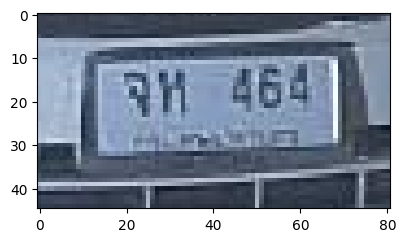


0: 384x640 2 4s, 1 6, 1 จ, 1 ห, 1 กรุงเทพมหานคร, 20.1ms
Speed: 2.0ms preprocess, 20.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[[53.841880798339844, 16.261436462402344, 10.40475082397461, 17.836328506469727], [22.302268981933594, 17.955537796020508, 13.125494956970215, 19.30538558959961], [61.35034942626953, 16.273073196411133, 10.895259857177734, 17.458843231201172], [40.92985534667969, 30.06116485595703, 46.59028625488281, 12.986152648925781], [31.835433959960938, 17.58211898803711, 12.077516555786133, 18.357139587402344], [47.05113220214844, 17.15283203125, 9.992599487304688, 18.120222091674805]]
[6, 17, 4, 54, 50, 4]
0จห464
/content/test/test/59c765b1-cdac-4fa7-902c-685f1591decf.jpg
/content/test/test/59c765b1-cdac-4fa7-902c-685f1591decf.jpg
/content/test/test/59c765b1-cdac-4fa7-902c-685f1591decf.jpg 304 152 386 201


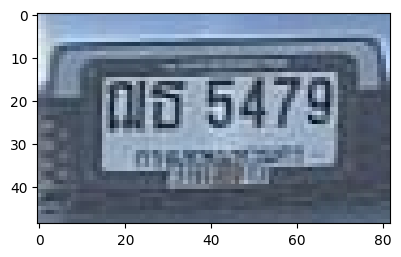


0: 384x640 1 4, 1 7, 1 9, 1 ฌ, 1 ธ, 1 กรุงเทพมหานคร, 19.8ms
Speed: 1.6ms preprocess, 19.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[19.191917419433594, 19.95446014404297, 16.982301712036133, 20.799549102783203], [58.027549743652344, 19.824565887451172, 10.86422348022461, 21.170225143432617], [30.991069793701172, 20.186935424804688, 14.776641845703125, 23.968957901000977], [50.900325775146484, 20.56376075744629, 10.983085632324219, 20.147186279296875], [42.518646240234375, 33.927146911621094, 47.765567779541016, 10.861488342285156], [66.63497924804688, 20.240192413330078, 11.458240509033203, 20.45650863647461]]
[21, 7, 33, 4, 54, 9]
0ฌธ479
/content/test/test/8485e66a-cc0c-4ec5-aca8-edc13e92f532.jpg
/content/test/test/8485e66a-cc0c-4ec5-aca8-edc13e92f532.jpg
/content/test/test/8485e66a-cc0c-4ec5-aca8-edc13e92f532.jpg 320 211 400 259


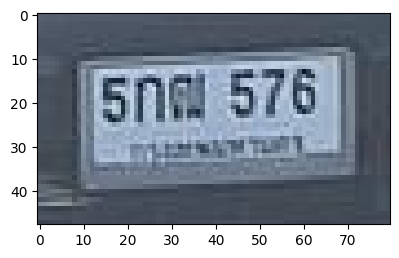


0: 384x640 2 5s, 1 6, 1 7, 1 ก, 1 ฒ, 1 กรุงเทพมหานคร, 20.3ms
Speed: 1.7ms preprocess, 20.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[[34.96265411376953, 17.871543884277344, 13.647676467895508, 20.4346923828125], [61.237953186035156, 16.870149612426758, 11.355377197265625, 21.411518096923828], [53.7979736328125, 17.80342674255371, 9.842086791992188, 19.27872085571289], [46.22690200805664, 17.400075912475586, 11.673919677734375, 20.860187530517578], [40.84452438354492, 31.743938446044922, 49.81171417236328, 13.835014343261719], [25.74993133544922, 19.157339096069336, 12.292739868164062, 19.540958404541016], [16.249618530273438, 18.2822265625, 14.42135238647461, 22.084014892578125]]
[27, 6, 7, 5, 54, 10, 5]
05กฒ576
/content/test/test/e1c2b08a-4688-43e7-907b-ed025b5b2f43.jpg
/content/test/test/e1c2b08a-4688-43e7-907b-ed025b5b2f43.jpg
/content/test/test/e1c2b08a-4688-43e7-907b-ed025b5b2f43.jpg 324 171 402 219


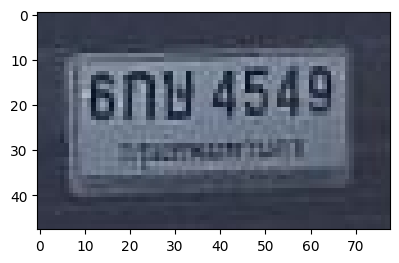


0: 416x640 2 4s, 1 5, 1 6, 1 9, 1 ก, 1 ษ, 1 กรุงเทพมหานคร, 20.8ms
Speed: 1.9ms preprocess, 20.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)
[[41.81500244140625, 17.737281799316406, 10.548866271972656, 19.44420051574707], [31.997966766357422, 17.030536651611328, 13.096292495727539, 21.75418472290039], [13.464682579040527, 17.83321189880371, 12.652799606323242, 20.184703826904297], [38.455474853515625, 31.01475715637207, 51.84769058227539, 13.479793548583984], [48.89165496826172, 17.163026809692383, 11.169780731201172, 20.588186264038086], [22.56694793701172, 17.901138305664062, 12.23188591003418, 19.84916114807129], [63.51055908203125, 16.746631622314453, 11.877456665039062, 20.550174713134766], [56.21179962158203, 17.724096298217773, 11.29470443725586, 21.144304275512695]]
[4, 48, 6, 54, 5, 10, 9, 4]
06กษ4549
/content/test/test/954b59dc-b324-4099-9f31-a6bb0e60fd8f.jpg
/content/test/test/954b59dc-b324-4099-9f31-a6bb0e60fd8f.jpg
/content/test/test/954b59dc-b324-40

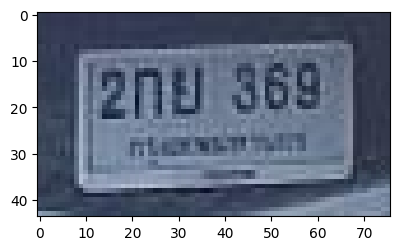


0: 384x640 1 2, 1 3, 1 6, 1 9, 1 ก, 1 กรุงเทพมหานคร, 20.5ms
Speed: 1.7ms preprocess, 20.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[44.53040313720703, 15.685182571411133, 10.096965789794922, 18.601154327392578], [51.571266174316406, 14.962116241455078, 9.12448501586914, 17.814796447753906], [15.532995223999023, 17.38404655456543, 11.556106567382812, 18.263992309570312], [39.09278869628906, 29.062122344970703, 47.43141174316406, 11.389997482299805], [23.86433219909668, 16.846500396728516, 11.141525268554688, 18.12043571472168], [59.5323371887207, 15.781269073486328, 11.247764587402344, 18.741226196289062]]
[3, 6, 2, 54, 10, 9]
02ก369
/content/test/test/b446711f-f25d-42c7-8b88-09a0ea24c0a7.jpg
/content/test/test/b446711f-f25d-42c7-8b88-09a0ea24c0a7.jpg
/content/test/test/b446711f-f25d-42c7-8b88-09a0ea24c0a7.jpg 333 201 413 247


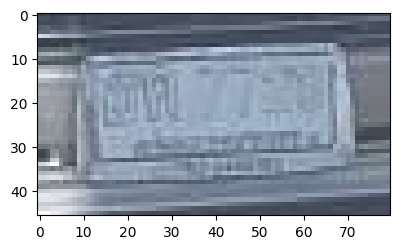


0: 384x640 1 ข, 1 ญ, 20.2ms
Speed: 1.5ms preprocess, 20.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[30.11516571044922, 18.569419860839844, 11.773880004882812, 18.179927825927734], [22.996557235717773, 18.89556312561035, 14.134445190429688, 17.667537689208984]]
[11, 22]
0ญข
/content/test/test/7f5db1b6-da8e-4fab-9129-3fd159d0270d.jpg
/content/test/test/7f5db1b6-da8e-4fab-9129-3fd159d0270d.jpg
/content/test/test/7f5db1b6-da8e-4fab-9129-3fd159d0270d.jpg 333 150 415 195


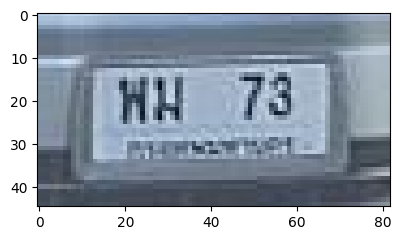


0: 352x640 1 3, 1 7, 1 ม, 1 กรุงเทพมหานคร, 20.5ms
Speed: 1.4ms preprocess, 20.5ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)
[[57.790138244628906, 18.938125610351562, 12.105762481689453, 19.870346069335938], [49.35912322998047, 19.22342300415039, 12.464881896972656, 19.885892868041992], [41.06156539916992, 32.294551849365234, 50.768699645996094, 13.161828994750977], [31.638851165771484, 18.98208999633789, 14.389930725097656, 19.299644470214844]]
[3, 7, 54, 42]
0ม73
/content/test/test/d6f6c21b-2778-4ff2-92a0-ee34a47b41be.jpg
/content/test/test/d6f6c21b-2778-4ff2-92a0-ee34a47b41be.jpg
/content/test/test/d6f6c21b-2778-4ff2-92a0-ee34a47b41be.jpg 337 206 432 252


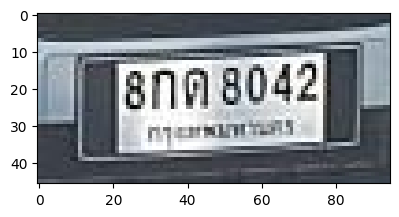


0: 320x640 1 0, 1 2, 1 4, 2 8s, 1 ก, 1 ต, 1 กรุงเทพมหานคร, 20.6ms
Speed: 1.4ms preprocess, 20.6ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)
[[74.17292785644531, 19.135604858398438, 12.537132263183594, 21.18692398071289], [34.247222900390625, 20.82230567932129, 12.25831413269043, 20.298248291015625], [66.74370574951172, 19.221872329711914, 9.920650482177734, 19.642269134521484], [26.330297470092773, 20.547393798828125, 11.850971221923828, 19.22292709350586], [52.152313232421875, 19.539426803588867, 10.832412719726562, 19.881832122802734], [43.58355712890625, 20.47848129272461, 12.560997009277344, 20.568984985351562], [50.22380828857422, 32.08866882324219, 48.76316833496094, 12.586990356445312], [59.2366943359375, 19.35810661315918, 10.41934585571289, 18.610515594482422]]
[2, 10, 4, 8, 8, 30, 54, 0]
08กต8042
/content/test/test/664107af-b67c-40bf-ab0a-3a862e118c95.jpg
/content/test/test/664107af-b67c-40bf-ab0a-3a862e118c95.jpg
/content/test/test/664107af-b67c-40bf-

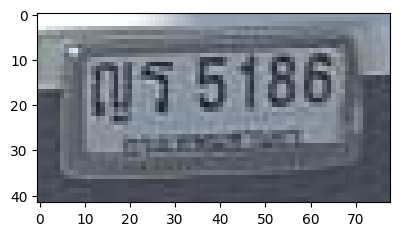


0: 352x640 1 1, 1 5, 1 6, 1 8, 1 ญ, 1 ร, 1 กรุงเทพมหานคร, 20.6ms
Speed: 1.5ms preprocess, 20.6ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)
[[15.88487434387207, 17.083261489868164, 16.68419647216797, 22.519201278686523], [47.02330017089844, 15.04223918914795, 9.666969299316406, 20.11863899230957], [62.960975646972656, 14.23452377319336, 12.857467651367188, 20.641193389892578], [53.88663864135742, 14.114670753479004, 10.640037536621094, 20.12287712097168], [27.14204216003418, 15.659055709838867, 12.423198699951172, 20.01709747314453], [38.908809661865234, 29.840778350830078, 49.94282150268555, 12.389938354492188], [38.54182815551758, 14.828861236572266, 12.910240173339844, 20.94952392578125]]
[22, 1, 6, 8, 44, 54, 5]
0ญร5186
/content/test/test/35e02dd3-a30c-4fcd-86e9-03ceb74f62c4.jpg
/content/test/test/35e02dd3-a30c-4fcd-86e9-03ceb74f62c4.jpg
/content/test/test/35e02dd3-a30c-4fcd-86e9-03ceb74f62c4.jpg 315 205 397 253


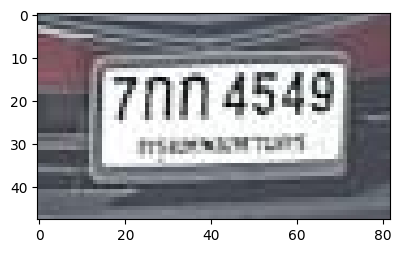


0: 384x640 2 4s, 1 5, 1 7, 1 9, 2 กs, 1 กรุงเทพมหานคร, 23.4ms
Speed: 1.6ms preprocess, 23.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
[[67.52529907226562, 18.92729377746582, 11.038768768310547, 19.036426544189453], [43.30882263183594, 30.697002410888672, 49.36350631713867, 12.15864372253418], [19.942058563232422, 19.81887435913086, 12.039710998535156, 20.989994049072266], [46.57801055908203, 18.335248947143555, 10.161537170410156, 19.765872955322266], [60.450889587402344, 18.99325180053711, 10.153549194335938, 18.676456451416016], [53.352027893066406, 17.97031021118164, 10.628070831298828, 19.528169631958008], [37.34266662597656, 19.15651512145996, 12.788036346435547, 19.865726470947266], [28.138381958007812, 19.213972091674805, 11.835763931274414, 19.90235137939453]]
[9, 54, 7, 4, 4, 5, 10, 10]
07กก4549
/content/test/test/a19fbfd2-e621-434b-b6c3-95467bcde8c2.jpg
/content/test/test/a19fbfd2-e621-434b-b6c3-95467bcde8c2.jpg
/content/test/test/a19fbfd2-e621-434b-

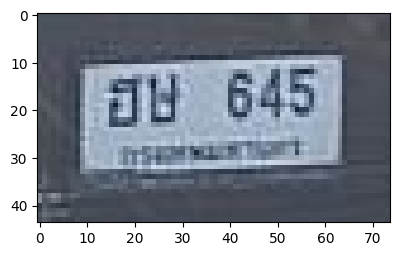


0: 384x640 1 4, 1 5, 1 6, 1 ษ, 1 ฮ, 1 กรุงเทพมหานคร, 22.5ms
Speed: 1.6ms preprocess, 22.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[27.274658203125, 16.619403839111328, 12.483423233032227, 20.126258850097656], [42.088409423828125, 16.930248260498047, 11.135509490966797, 17.635177612304688], [49.79695129394531, 16.482223510742188, 9.543113708496094, 19.34406852722168], [56.334815979003906, 15.667344093322754, 11.131229400634766, 19.39063835144043], [36.32982635498047, 28.856952667236328, 47.97916030883789, 8.949811935424805], [17.518550872802734, 18.288856506347656, 13.703213691711426, 20.245933532714844]]
[48, 6, 4, 5, 54, 53]
0ฮษ645
/content/test/test/646429d6-7fec-4991-b0ea-171da67ffc38.jpg
/content/test/test/646429d6-7fec-4991-b0ea-171da67ffc38.jpg
/content/test/test/646429d6-7fec-4991-b0ea-171da67ffc38.jpg 314 188 393 226


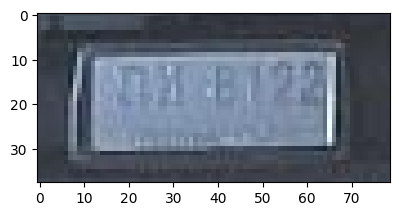


0: 320x640 2 2s, 21.9ms
Speed: 1.3ms preprocess, 21.9ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)
[[62.550811767578125, 15.165300369262695, 10.86111068725586, 16.355579376220703], [55.16262435913086, 14.843049049377441, 9.059967041015625, 15.476594924926758]]
[2, 2]
022
/content/test/test/894fccde-c08a-4196-889b-5f4518f12a50.jpg
/content/test/test/894fccde-c08a-4196-889b-5f4518f12a50.jpg
/content/test/test/894fccde-c08a-4196-889b-5f4518f12a50.jpg 357 213 439 259


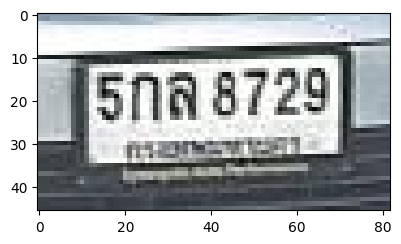


0: 384x640 1 2, 1 5, 1 7, 1 8, 1 9, 1 ก, 1 ล, 1 กรุงเทพมหานคร, 22.4ms
Speed: 1.8ms preprocess, 22.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[34.45133590698242, 19.011913299560547, 12.606124877929688, 19.662260055541992], [58.682884216308594, 18.777246475219727, 11.67730712890625, 19.98249053955078], [43.87197494506836, 18.656604766845703, 10.856536865234375, 18.98576545715332], [25.30642318725586, 19.6263427734375, 11.899169921875, 18.357860565185547], [16.4307804107666, 19.075927734375, 12.74267292022705, 18.780885696411133], [50.94709777832031, 18.48756217956543, 10.759078979492188, 20.275238037109375], [42.20780944824219, 31.395183563232422, 51.39198303222656, 11.036598205566406], [66.07063293457031, 18.22125244140625, 11.448448181152344, 19.594459533691406]]
[45, 2, 8, 10, 5, 7, 54, 9]
05กล8729
/content/test/test/6c38700d-0284-437e-9835-614488ac4686.jpg
/content/test/test/6c38700d-0284-437e-9835-614488ac4686.jpg
/content/test/test/6c38700d-0284-437e-983

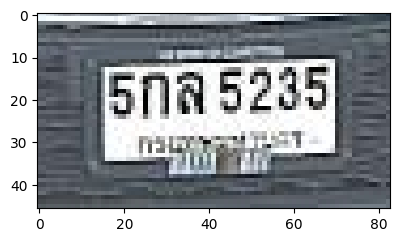


0: 384x640 1 2, 1 3, 3 5s, 1 ก, 1 ล, 1 กรุงเทพมหานคร, 21.4ms
Speed: 1.5ms preprocess, 21.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[36.724910736083984, 18.84320640563965, 12.072013854980469, 18.86090850830078], [59.53125, 17.63253402709961, 9.57175064086914, 17.64630126953125], [45.583621978759766, 18.013896942138672, 10.865821838378906, 17.804264068603516], [66.56271362304688, 17.736387252807617, 11.488601684570312, 18.909778594970703], [52.74019241333008, 18.711210250854492, 10.137535095214844, 17.15782928466797], [19.170446395874023, 18.84580421447754, 13.063399314880371, 19.22390365600586], [27.76259994506836, 18.94415855407715, 12.075286865234375, 19.735172271728516], [42.98597717285156, 30.718616485595703, 48.6146240234375, 11.303110122680664]]
[45, 3, 5, 5, 2, 5, 10, 54]
05กล5235
/content/test/test/6144c22b-8fc9-414b-a420-882883c49976.jpg
/content/test/test/6144c22b-8fc9-414b-a420-882883c49976.jpg
/content/test/test/6144c22b-8fc9-414b-a420-882883c499

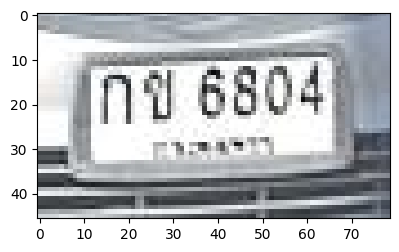


0: 384x640 2 0s, 1 4, 2 6s, 1 ก, 1 ข, 21.5ms
Speed: 1.5ms preprocess, 21.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[27.948810577392578, 18.384145736694336, 12.512002944946289, 20.162193298339844], [38.90935516357422, 17.460163116455078, 11.188003540039062, 19.98119354248047], [17.335891723632812, 18.969806671142578, 15.38984489440918, 19.918106079101562], [54.19029998779297, 17.565698623657227, 11.940074920654297, 19.72171401977539], [62.872711181640625, 17.461841583251953, 12.57522201538086, 20.739133834838867], [46.67456817626953, 17.57052993774414, 10.92095947265625, 19.375349044799805], [54.30060577392578, 17.665891647338867, 12.032527923583984, 19.951610565185547]]
[11, 6, 10, 0, 4, 6, 0]
0กข66004
/content/test/test/34114a14-11c1-4764-8b15-b2e934e3c548.jpg
/content/test/test/34114a14-11c1-4764-8b15-b2e934e3c548.jpg
/content/test/test/34114a14-11c1-4764-8b15-b2e934e3c548.jpg 312 206 388 250


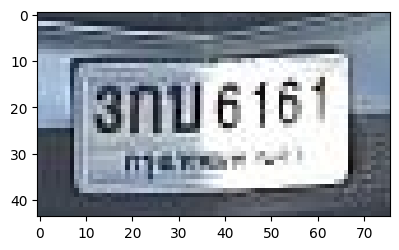


0: 384x640 2 1s, 1 3, 2 6s, 1 ก, 1 บ, 1 กรุงเทพมหานคร, 20.7ms
Speed: 1.9ms preprocess, 20.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[14.158366203308105, 19.693836212158203, 13.749387741088867, 21.471759796142578], [48.722747802734375, 19.679718017578125, 8.34036636352539, 18.710220336914062], [62.86558532714844, 18.583450317382812, 12.557147979736328, 21.19145965576172], [41.447235107421875, 19.07993507385254, 10.986064910888672, 20.304153442382812], [54.78728103637695, 18.672380447387695, 10.168586730957031, 19.899826049804688], [23.39875030517578, 20.266040802001953, 11.470808029174805, 19.552366256713867], [38.71179962158203, 32.562355041503906, 49.492218017578125, 13.129232406616211], [32.36687088012695, 18.69411277770996, 12.806467056274414, 21.732017517089844]]
[3, 1, 1, 6, 6, 10, 54, 35]
03กบ6161
/content/test/test/de457111-30f5-4289-9725-53f71be755bf.jpg
/content/test/test/de457111-30f5-4289-9725-53f71be755bf.jpg
/content/test/test/de457111-30f5-428

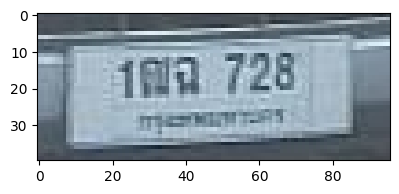


0: 288x640 1 1, 1 2, 1 7, 1 8, 1 ฉ, 1 ฒ, 1 กรุงเทพมหานคร, 20.8ms
Speed: 1.3ms preprocess, 20.8ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 640)
[[32.07615661621094, 16.41331672668457, 12.969535827636719, 18.585792541503906], [24.178897857666016, 16.839977264404297, 10.712182998657227, 18.452762603759766], [41.7603645324707, 16.23190689086914, 13.19842529296875, 19.031612396240234], [61.20729064941406, 16.00905990600586, 10.838912963867188, 19.181705474853516], [53.433876037597656, 15.518637657165527, 11.275672912597656, 18.884950637817383], [68.73252868652344, 15.37220287322998, 12.623737335205078, 19.075780868530273], [47.53656005859375, 28.779260635375977, 50.930816650390625, 12.064464569091797]]
[27, 1, 18, 2, 7, 8, 54]
01ฒฉ728
/content/test/test/77a26a59-bace-4a21-980b-411ed4f7973f.jpg
/content/test/test/77a26a59-bace-4a21-980b-411ed4f7973f.jpg
/content/test/test/77a26a59-bace-4a21-980b-411ed4f7973f.jpg 328 204 405 248


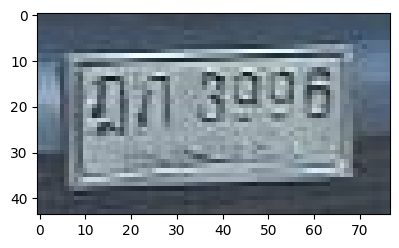


0: 384x640 1 ฎ, 21.0ms
Speed: 1.5ms preprocess, 21.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[15.347497940063477, 19.392902374267578, 14.814642906188965, 22.37406349182129]]
[23]
0ฎ
/content/test/test/78a0de00-75fd-4778-942a-c53812c82fa5.jpg
/content/test/test/78a0de00-75fd-4778-942a-c53812c82fa5.jpg
/content/test/test/78a0de00-75fd-4778-942a-c53812c82fa5.jpg 347 188 426 234


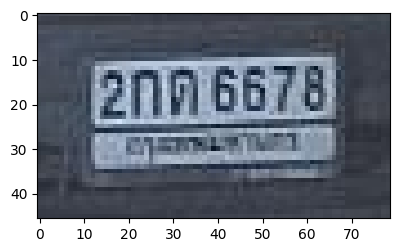


0: 384x640 1 2, 2 6s, 1 7, 1 8, 1 ก, 1 ต, 1 กรุงเทพมหานคร, 20.3ms
Speed: 2.0ms preprocess, 20.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[16.335922241210938, 17.782869338989258, 11.923418998718262, 18.233715057373047], [48.805946350097656, 16.159896850585938, 9.497547149658203, 17.35470199584961], [63.13548278808594, 16.035747528076172, 11.959991455078125, 19.377300262451172], [24.193679809570312, 17.2548885345459, 10.771417617797852, 18.11834716796875], [55.49007034301758, 17.13193130493164, 9.368667602539062, 17.627052307128906], [41.66154479980469, 16.433258056640625, 10.02297592163086, 18.040897369384766], [32.952274322509766, 17.59426498413086, 11.299505233764648, 17.085247039794922], [39.38385009765625, 28.574565887451172, 48.32760238647461, 11.28703498840332]]
[2, 6, 8, 10, 7, 6, 30, 54]
02กต6678
/content/test/test/2dff71e8-ffa4-413a-b955-becd1bda5301.jpg
/content/test/test/2dff71e8-ffa4-413a-b955-becd1bda5301.jpg
/content/test/test/2dff71e8-ffa4-413a

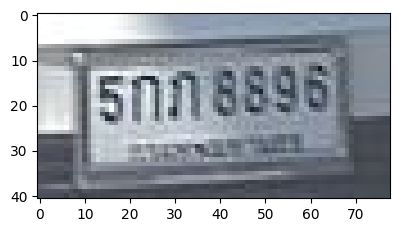


0: 352x640 1 3, 1 5, 1 6, 1 8, 1 ก, 1 ภ, 1 กรุงเทพมหานคร, 22.8ms
Speed: 1.9ms preprocess, 22.8ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)
[[15.494900703430176, 17.96967315673828, 12.936960220336914, 19.568269729614258], [24.260730743408203, 18.043642044067383, 11.680889129638672, 19.328197479248047], [32.8851318359375, 17.439523696899414, 12.97220230102539, 19.680625915527344], [39.136749267578125, 30.718883514404297, 48.4157600402832, 13.133764266967773], [62.633636474609375, 15.580721855163574, 12.066829681396484, 19.942033767700195], [41.59616470336914, 16.762475967407227, 10.887100219726562, 19.93728256225586], [48.5578498840332, 15.93459701538086, 9.794990539550781, 20.498817443847656]]
[5, 10, 41, 54, 6, 8, 3]
05กภ836
/content/test/test/f18092c6-0ba9-4d7a-95dd-29d3704de175.jpg
/content/test/test/f18092c6-0ba9-4d7a-95dd-29d3704de175.jpg
/content/test/test/f18092c6-0ba9-4d7a-95dd-29d3704de175.jpg 339 197 418 243


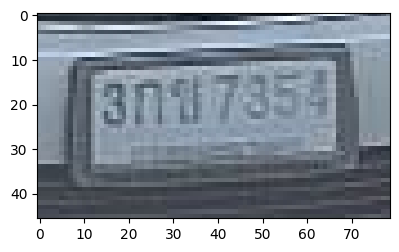


0: 384x640 2 3s, 1 5, 1 7, 1 ก, 1 ข, 20.6ms
Speed: 1.6ms preprocess, 20.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[[33.864967346191406, 18.397727966308594, 12.163597106933594, 19.51712417602539], [42.54484558105469, 18.523120880126953, 10.971172332763672, 19.33145523071289], [16.136627197265625, 19.288427352905273, 14.071264266967773, 20.668476104736328], [25.19211196899414, 18.938568115234375, 12.050390243530273, 19.441726684570312], [56.32671356201172, 17.0120906829834, 10.499080657958984, 19.477548599243164], [49.563079833984375, 17.94626235961914, 10.477508544921875, 20.313432693481445]]
[11, 7, 3, 10, 5, 3]
03กข735
/content/test/test/7759cbfd-734b-4b84-bb40-1895977f5bb9.jpg
/content/test/test/7759cbfd-734b-4b84-bb40-1895977f5bb9.jpg
/content/test/test/7759cbfd-734b-4b84-bb40-1895977f5bb9.jpg 320 208 395 250


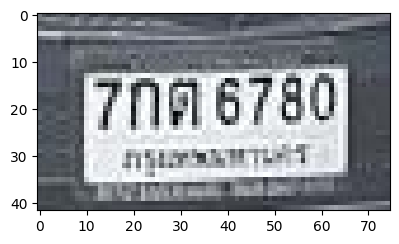


0: 384x640 1 6, 2 7s, 1 8, 1 ก, 1 กรุงเทพมหานคร, 19.9ms
Speed: 2.1ms preprocess, 19.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[40.59942626953125, 17.72756576538086, 10.259654998779297, 18.630043029785156], [47.47902297973633, 18.207042694091797, 9.857742309570312, 18.49267578125], [15.029045104980469, 19.121103286743164, 11.74851131439209, 19.12267303466797], [22.81999969482422, 19.171667098999023, 11.680719375610352, 18.44814682006836], [38.33385467529297, 30.759368896484375, 48.787593841552734, 11.767145156860352], [54.10993194580078, 18.311328887939453, 9.43618392944336, 17.304359436035156]]
[6, 7, 7, 10, 54, 8]
07ก678
/content/test/test/81082d16-db84-4e1e-b30d-997cb8d5cad2.jpg
/content/test/test/81082d16-db84-4e1e-b30d-997cb8d5cad2.jpg
/content/test/test/81082d16-db84-4e1e-b30d-997cb8d5cad2.jpg 320 173 397 218


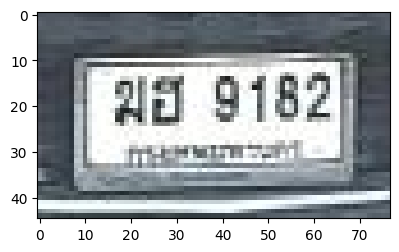


0: 384x640 1 1, 1 2, 1 8, 1 9, 1 ฮ, 20.0ms
Speed: 2.2ms preprocess, 20.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[48.975223541259766, 18.697416305541992, 9.031715393066406, 19.834518432617188], [41.28020477294922, 18.408409118652344, 11.522640228271484, 19.019779205322266], [62.5506477355957, 18.767765045166016, 12.052284240722656, 19.718765258789062], [54.99688720703125, 18.007965087890625, 10.201080322265625, 19.427650451660156], [29.43665313720703, 19.120412826538086, 13.937559127807617, 21.471572875976562]]
[1, 9, 2, 8, 53]
0ฮ9182
/content/test/test/e5d0c1f2-16cf-406f-907e-0c2419b7452a.jpg
/content/test/test/e5d0c1f2-16cf-406f-907e-0c2419b7452a.jpg
/content/test/test/e5d0c1f2-16cf-406f-907e-0c2419b7452a.jpg 307 203 386 250


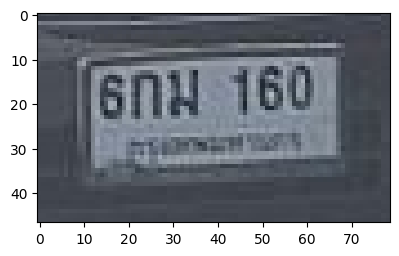


0: 384x640 1 0, 1 1, 2 6s, 1 ก, 1 ม, 1 กรุงเทพมหานคร, 20.6ms
Speed: 2.0ms preprocess, 20.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[59.72173309326172, 16.77419662475586, 11.535022735595703, 19.675289154052734], [45.80220031738281, 17.541282653808594, 10.225196838378906, 19.181053161621094], [52.460731506347656, 16.34286117553711, 9.951900482177734, 18.10538101196289], [15.721054077148438, 17.93447494506836, 12.37215518951416, 20.095867156982422], [39.77198028564453, 29.316280364990234, 48.79029846191406, 11.445241928100586], [24.46866226196289, 17.512907028198242, 11.550317764282227, 19.955228805541992], [33.85737609863281, 17.214380264282227, 13.671737670898438, 20.24156951904297]]
[0, 1, 6, 6, 54, 10, 42]
06กม160
/content/test/test/eabf0ef3-b6d3-4356-96c1-7ab08e1d087c.jpg
/content/test/test/eabf0ef3-b6d3-4356-96c1-7ab08e1d087c.jpg
/content/test/test/eabf0ef3-b6d3-4356-96c1-7ab08e1d087c.jpg 289 188 366 237


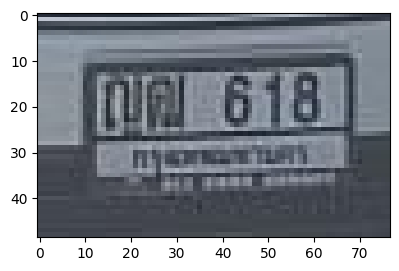


0: 416x640 1 1, 1 6, 1 8, 1 ญ, 1 ฒ, 1 กรุงเทพมหานคร, 20.4ms
Speed: 2.0ms preprocess, 20.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
[[51.92739486694336, 18.945777893066406, 9.120521545410156, 19.069026947021484], [17.10567855834961, 18.679121017456055, 15.991804122924805, 22.010997772216797], [43.57056427001953, 18.285045623779297, 12.298442840576172, 19.97203826904297], [59.09010314941406, 17.203065872192383, 12.34268569946289, 21.198341369628906], [40.14397430419922, 30.999347686767578, 47.89295959472656, 10.466514587402344], [29.04840087890625, 17.879182815551758, 15.166852951049805, 22.270065307617188]]
[1, 22, 6, 8, 54, 27]
0ญฒ618
/content/test/test/72814829-6dd5-4b16-86be-79737c5ad547.jpg
/content/test/test/72814829-6dd5-4b16-86be-79737c5ad547.jpg
/content/test/test/72814829-6dd5-4b16-86be-79737c5ad547.jpg 319 172 401 216


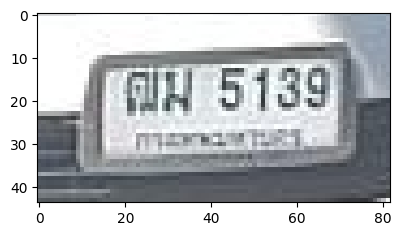


0: 352x640 1 1, 1 3, 1 5, 1 9, 1 ฒ, 2 มs, 1 กรุงเทพมหานคร, 20.9ms
Speed: 1.7ms preprocess, 20.9ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)
[[59.069732666015625, 17.56554412841797, 9.808876037597656, 16.87730598449707], [22.8570613861084, 17.48427391052246, 16.017189025878906, 19.955699920654297], [52.811500549316406, 17.72694206237793, 9.47427749633789, 17.862529754638672], [66.55220031738281, 17.594982147216797, 11.6387939453125, 19.260486602783203], [45.21200942993164, 17.449081420898438, 11.995765686035156, 17.90609359741211], [42.439735412597656, 29.913646697998047, 49.24131774902344, 11.866857528686523], [33.390262603759766, 17.85979461669922, 13.253555297851562, 18.619304656982422], [33.26536560058594, 17.740478515625, 13.193181991577148, 18.150371551513672]]
[3, 27, 1, 9, 5, 54, 42, 42]
0ฒมม5139
/content/test/test/0cc12c1b-98a7-4670-b543-77f4e1a8c3e9.jpg
/content/test/test/0cc12c1b-98a7-4670-b543-77f4e1a8c3e9.jpg
/content/test/test/0cc12c1b-98a7-4670-b54

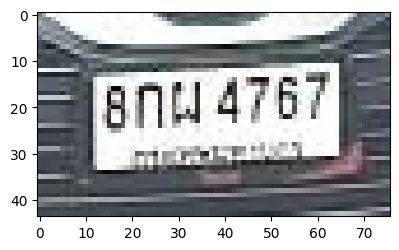


0: 384x640 1 4, 1 6, 2 7s, 1 8, 1 ก, 1 ผ, 20.9ms
Speed: 1.6ms preprocess, 20.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[24.62029457092285, 19.817764282226562, 11.220932006835938, 18.18462371826172], [47.69138717651367, 18.898963928222656, 9.3477783203125, 19.103843688964844], [33.0323371887207, 18.861053466796875, 13.319581985473633, 19.55233383178711], [61.80128479003906, 18.38064956665039, 12.564315795898438, 20.32061767578125], [41.690128326416016, 19.22527313232422, 9.623069763183594, 18.415374755859375], [54.084686279296875, 17.920236587524414, 10.161113739013672, 18.265281677246094], [16.637855529785156, 20.247787475585938, 11.434721946716309, 18.051210403442383]]
[10, 7, 37, 7, 4, 6, 8]
08กผ4767
/content/test/test/d04ebf1b-89de-45e5-825b-8a4a34015f35.jpg
/content/test/test/d04ebf1b-89de-45e5-825b-8a4a34015f35.jpg
/content/test/test/d04ebf1b-89de-45e5-825b-8a4a34015f35.jpg 322 146 397 190


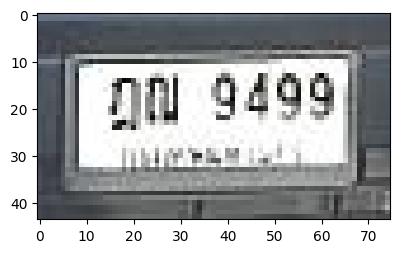


0: 384x640 1 4, 3 9s, 1 ฎ, 1 ณ, 20.9ms
Speed: 1.6ms preprocess, 20.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)
[[61.91901397705078, 17.738048553466797, 12.523197174072266, 19.407384872436523], [17.933589935302734, 19.16522979736328, 13.822147369384766, 19.944232940673828], [39.786460876464844, 17.905845642089844, 11.661441802978516, 18.429309844970703], [47.76953125, 18.127668380737305, 10.562023162841797, 19.227947235107422], [27.853145599365234, 17.98150634765625, 14.278070449829102, 20.36709213256836], [40.12266159057617, 18.155040740966797, 11.298637390136719, 18.263412475585938]]
[9, 23, 9, 4, 28, 9]
0ฎณ9949
/content/test/test/6156a97a-ff92-4233-a6f3-8c4c05e3ae5e.jpg
/content/test/test/6156a97a-ff92-4233-a6f3-8c4c05e3ae5e.jpg
/content/test/test/6156a97a-ff92-4233-a6f3-8c4c05e3ae5e.jpg 312 195 388 241


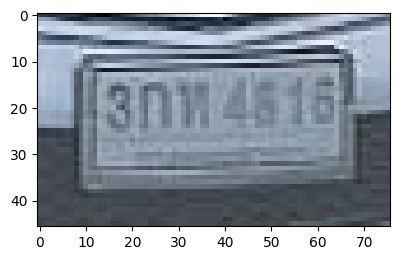


0: 416x640 1 1, 1 3, 1 4, 1 6, 1 ก, 20.2ms
Speed: 1.7ms preprocess, 20.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
[[17.040668487548828, 20.349536895751953, 11.658256530761719, 18.801801681518555], [56.203704833984375, 18.60883903503418, 8.822399139404297, 16.860401153564453], [42.90619659423828, 18.673442840576172, 9.010257720947266, 16.91077423095703], [62.620887756347656, 18.371723175048828, 10.660507202148438, 18.731908798217773], [25.390413284301758, 19.306514739990234, 11.068706512451172, 17.212379455566406]]
[3, 1, 4, 6, 10]
03ก416
/content/test/test/839bec88-0d2a-468b-913b-953a3288f5f8.jpg
/content/test/test/839bec88-0d2a-468b-913b-953a3288f5f8.jpg
/content/test/test/839bec88-0d2a-468b-913b-953a3288f5f8.jpg 352 198 433 246


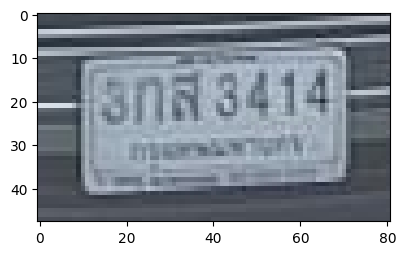


0: 384x640 1 1, 2 3s, 2 4s, 1 ก, 1 ส, 1 กรุงเทพมหานคร, 24.2ms
Speed: 2.0ms preprocess, 24.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[[34.653873443603516, 18.847076416015625, 12.721052169799805, 20.52324867248535], [58.339561462402344, 18.28428840637207, 9.412296295166016, 20.545719146728516], [43.91461944580078, 18.259061813354492, 10.992321014404297, 20.664291381835938], [65.71366882324219, 17.983633041381836, 11.685680389404297, 19.332763671875], [16.911052703857422, 19.45401382446289, 12.408838272094727, 20.892457962036133], [51.349220275878906, 18.770198822021484, 10.28940200805664, 21.204845428466797], [41.16275405883789, 31.693492889404297, 49.75395965576172, 12.391767501831055], [25.674602508544922, 19.527101516723633, 11.597421646118164, 19.70610809326172]]
[49, 1, 3, 4, 3, 4, 54, 10]
03กส3414
/content/test/test/f4e0df7c-2c2b-4cd4-8ec3-e245852fbadb.jpg
/content/test/test/f4e0df7c-2c2b-4cd4-8ec3-e245852fbadb.jpg
/content/test/test/f4e0df7c-2c2b-4cd4-8

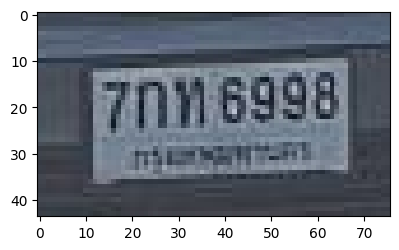


0: 384x640 1 6, 1 7, 1 8, 2 9s, 1 ก, 1 กรุงเทพมหานคร, 19.8ms
Speed: 1.5ms preprocess, 19.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[49.20295715332031, 18.67377281188965, 9.855560302734375, 17.654598236083984], [56.061119079589844, 18.320629119873047, 9.915290832519531, 18.07443618774414], [42.109405517578125, 18.550106048583984, 11.053730010986328, 19.325048446655273], [63.33007049560547, 17.657176971435547, 11.533248901367188, 20.48330307006836], [16.977745056152344, 19.77708625793457, 12.455496788024902, 20.79907989501953], [24.757539749145508, 19.05108642578125, 11.690906524658203, 19.23799705505371], [40.498905181884766, 30.98846435546875, 50.328529357910156, 13.836271286010742]]
[9, 9, 6, 8, 7, 10, 54]
07ก6998
/content/test/test/8986f740-51e5-4832-968c-1b24cbb5636b.jpg
/content/test/test/8986f740-51e5-4832-968c-1b24cbb5636b.jpg
/content/test/test/8986f740-51e5-4832-968c-1b24cbb5636b.jpg 320 202 406 249


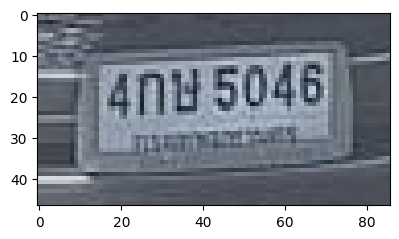


0: 352x640 1 0, 2 4s, 1 5, 1 6, 1 ก, 1 ษ, 1 กรุงเทพมหานคร, 20.7ms
Speed: 1.4ms preprocess, 20.7ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)
[[20.107160568237305, 20.046852111816406, 11.173809051513672, 19.283491134643555], [27.941753387451172, 19.074146270751953, 12.138069152832031, 20.109228134155273], [36.8169059753418, 17.82537841796875, 12.077461242675781, 20.676986694335938], [43.99605941772461, 31.855812072753906, 49.309608459472656, 13.359016418457031], [68.0914306640625, 17.340656280517578, 12.11175537109375, 21.323564529418945], [60.86566925048828, 17.719173431396484, 9.941486358642578, 19.198192596435547], [45.97782516479492, 17.906156539916992, 11.25421142578125, 18.977523803710938], [53.31452560424805, 18.446470260620117, 9.782752990722656, 17.088314056396484]]
[4, 10, 48, 54, 6, 4, 5, 0]
04กษ5046
/content/test/test/71f34c39-10cd-4653-b66a-9097b124db45.jpg
/content/test/test/71f34c39-10cd-4653-b66a-9097b124db45.jpg
/content/test/test/71f34c39-10cd-46

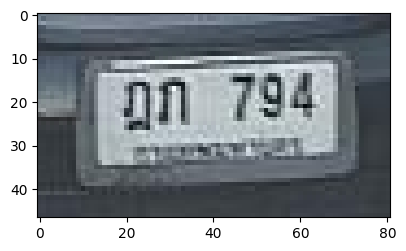


0: 384x640 1 4, 1 7, 1 9, 1 ฎ, 1 ภ, 1 กรุงเทพมหานคร, 25.5ms
Speed: 1.9ms preprocess, 25.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[[54.43016815185547, 19.14434051513672, 10.492244720458984, 18.74333381652832], [22.351215362548828, 20.72957992553711, 13.153253555297852, 20.407644271850586], [46.890472412109375, 19.551729202270508, 11.368114471435547, 19.687183380126953], [62.60823059082031, 19.238710403442383, 12.495403289794922, 20.033584594726562], [41.88695526123047, 32.60643005371094, 47.36116409301758, 13.198356628417969], [32.542930603027344, 20.450830459594727, 14.170574188232422, 19.396087646484375]]
[9, 23, 7, 4, 54, 41]
0ฎภ794
/content/test/test/94125e04-f802-4834-9c40-0f90ec82aa55.jpg
/content/test/test/94125e04-f802-4834-9c40-0f90ec82aa55.jpg
/content/test/test/94125e04-f802-4834-9c40-0f90ec82aa55.jpg 330 195 407 236


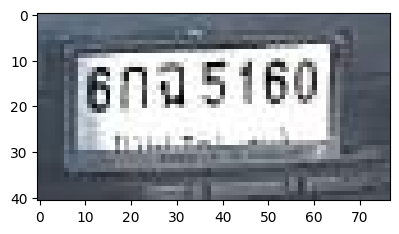


0: 352x640 1 0, 1 1, 1 5, 2 6s, 1 ก, 1 ฉ, 21.8ms
Speed: 1.5ms preprocess, 21.8ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)
[[30.214168548583984, 14.989724159240723, 12.346342086791992, 19.902902603149414], [46.02216339111328, 15.17607307434082, 9.083080291748047, 19.069324493408203], [12.806086540222168, 15.738760948181152, 12.595380783081055, 19.502946853637695], [21.399093627929688, 16.34409523010254, 11.713723182678223, 18.395479202270508], [52.4262580871582, 14.741689682006836, 10.033622741699219, 19.63702392578125], [38.744873046875, 14.923260688781738, 12.058330535888672, 18.59990882873535], [59.76756286621094, 14.9107084274292, 12.027545928955078, 19.441057205200195]]
[18, 1, 6, 10, 6, 5, 0]
06กฉ5160
/content/test/test/73817779-de9e-4787-8275-e7530f5d0334.jpg
/content/test/test/73817779-de9e-4787-8275-e7530f5d0334.jpg
/content/test/test/73817779-de9e-4787-8275-e7530f5d0334.jpg 292 181 368 225


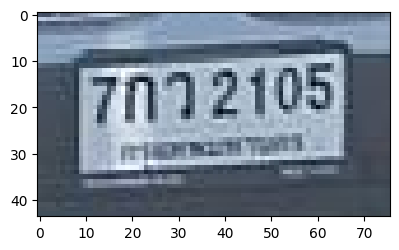


0: 384x640 1 0, 1 1, 1 2, 1 5, 2 7s, 1 ก, 1 ว, 1 กรุงเทพมหานคร, 20.4ms
Speed: 1.8ms preprocess, 20.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[61.84654235839844, 15.794610977172852, 11.68124771118164, 18.971343994140625], [47.801265716552734, 17.20473861694336, 8.322052001953125, 17.719268798828125], [54.38191223144531, 16.143924713134766, 10.347797393798828, 18.29323959350586], [31.798534393310547, 16.875207901000977, 12.393699645996094, 19.005584716796875], [40.50349807739258, 17.358951568603516, 10.842704772949219, 18.083202362060547], [22.671646118164062, 17.821630477905273, 12.41550064086914, 19.140274047851562], [37.413658142089844, 28.52898406982422, 49.14812088012695, 9.607414245605469], [14.270132064819336, 18.604089736938477, 11.9201021194458, 19.558712005615234], [14.249833106994629, 18.10390853881836, 11.901792526245117, 19.477155685424805]]
[5, 1, 0, 46, 2, 10, 54, 7, 7]
077กว2105
/content/test/test/2648c0b8-9dd2-490e-a909-a9d26a4c32fb.jpg
/cont

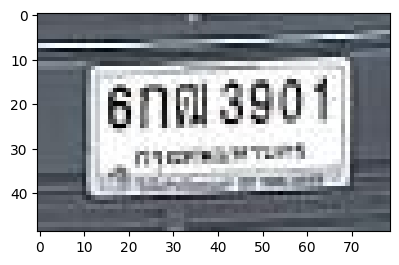


0: 416x640 1 1, 1 3, 1 6, 1 9, 1 ก, 1 ฒ, 1 กรุงเทพมหานคร, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
[[35.39268112182617, 20.06313133239746, 12.852453231811523, 19.284767150878906], [43.9498291015625, 20.14547348022461, 10.175846099853516, 18.068965911865234], [50.55082702636719, 20.034605026245117, 9.549144744873047, 17.820011138916016], [64.83975982666016, 19.97056007385254, 10.443408966064453, 19.072742462158203], [17.985288619995117, 20.73855209350586, 12.208194732666016, 20.954336166381836], [40.9193000793457, 32.12539291381836, 48.312599182128906, 11.594390869140625], [26.905460357666016, 20.839218139648438, 12.889974594116211, 19.837331771850586]]
[27, 3, 9, 1, 6, 54, 10]
06กฒ391
/content/test/test/3cd2b076-f0a5-45b0-b9e6-89a6cb839d89.jpg
/content/test/test/3cd2b076-f0a5-45b0-b9e6-89a6cb839d89.jpg
/content/test/test/3cd2b076-f0a5-45b0-b9e6-89a6cb839d89.jpg 316 198 391 237


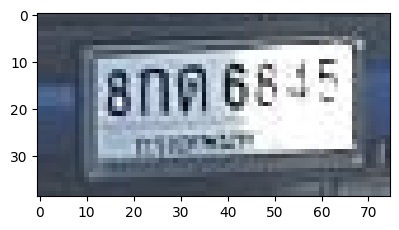


0: 352x640 1 5, 2 6s, 1 8, 1 ก, 21.0ms
Speed: 1.4ms preprocess, 21.0ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)
[[42.20731735229492, 15.32574462890625, 10.467964172363281, 19.147594451904297], [62.946327209472656, 13.928177833557129, 11.39065933227539, 18.819822311401367], [16.325891494750977, 16.5406436920166, 12.396178245544434, 19.111412048339844], [24.937057495117188, 16.47756004333496, 11.330329895019531, 18.605295181274414], [49.169654846191406, 14.848544120788574, 10.32281494140625, 18.4934139251709]]
[6, 5, 8, 10, 6]
08ก665
/content/test/test/82ec040e-21b4-46f6-947b-1755de8463e8.jpg
/content/test/test/82ec040e-21b4-46f6-947b-1755de8463e8.jpg
/content/test/test/82ec040e-21b4-46f6-947b-1755de8463e8.jpg 309 186 388 232


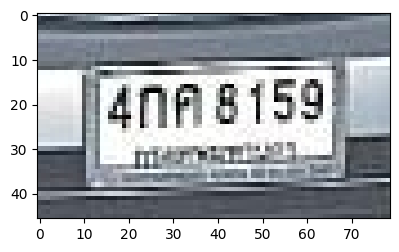


0: 384x640 1 1, 1 4, 1 5, 1 8, 1 9, 1 ก, 1 ค, 1 กรุงเทพมหานคร, 20.1ms
Speed: 1.9ms preprocess, 20.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[[34.48981857299805, 20.579971313476562, 11.728324890136719, 19.720806121826172], [18.845487594604492, 20.991369247436523, 10.66440486907959, 18.002418518066406], [49.75318908691406, 19.840059280395508, 8.76694107055664, 17.3690185546875], [25.992387771606445, 20.97062110900879, 11.028621673583984, 17.63540267944336], [55.522705078125, 19.146631240844727, 9.767597198486328, 17.284381866455078], [62.73851013183594, 19.436792373657227, 10.936397552490234, 18.459766387939453], [42.65129852294922, 19.462635040283203, 10.249637603759766, 17.711318969726562], [40.18720245361328, 31.89680290222168, 44.500892639160156, 11.808231353759766]]
[13, 4, 1, 10, 5, 9, 8, 54]
04กค8159
/content/test/test/1911d452-f620-487f-959f-3f515572374e.jpg
/content/test/test/1911d452-f620-487f-959f-3f515572374e.jpg
/content/test/test/1911d452-f620-48

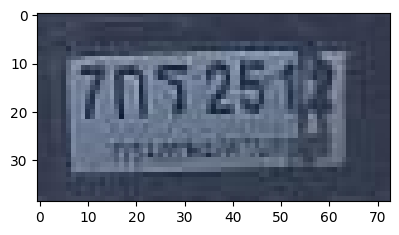


0: 352x640 1 2, 1 5, 1 7, 1 ก, 1 ร, 1 กรุงเทพมหานคร, 20.2ms
Speed: 1.4ms preprocess, 20.2ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)
[[28.459299087524414, 15.140825271606445, 12.579891204833984, 18.968608856201172], [44.73185729980469, 14.799333572387695, 10.362930297851562, 19.588539123535156], [19.645418167114258, 16.249340057373047, 12.4725341796875, 18.908763885498047], [10.999283790588379, 16.35220718383789, 11.238576889038086, 19.161697387695312], [37.68937301635742, 15.452315330505371, 11.202590942382812, 18.76032829284668], [32.63829803466797, 28.274669647216797, 43.7474250793457, 10.964479446411133]]
[44, 5, 10, 7, 2, 54]
07กร25
/content/test/test/89e4a431-3505-4265-98aa-d3817145a64f.jpg
/content/test/test/89e4a431-3505-4265-98aa-d3817145a64f.jpg
/content/test/test/89e4a431-3505-4265-98aa-d3817145a64f.jpg 367 199 442 241


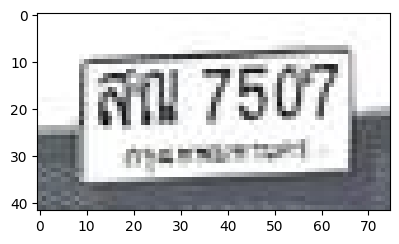


0: 384x640 1 0, 1 5, 2 7s, 1 ณ, 1 ส, 1 กรุงเทพมหานคร, 21.3ms
Speed: 1.7ms preprocess, 21.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[26.378448486328125, 17.49811553955078, 14.676261901855469, 19.88683319091797], [61.885162353515625, 16.768451690673828, 11.607654571533203, 19.669130325317383], [37.96668243408203, 17.49112319946289, 11.13925552368164, 19.408241271972656], [15.479524612426758, 18.096111297607422, 14.974479675292969, 19.399436950683594], [38.53718185424805, 30.204448699951172, 48.4837646484375, 11.391332626342773], [46.027503967285156, 16.679340362548828, 10.938850402832031, 18.57819366455078], [53.70003890991211, 16.882343292236328, 11.189033508300781, 18.784530639648438]]
[28, 7, 7, 49, 54, 5, 0]
0สณ7507
/content/test/test/73887ebd-12cb-429e-9e50-240ab1a520b1.jpg
/content/test/test/73887ebd-12cb-429e-9e50-240ab1a520b1.jpg
/content/test/test/73887ebd-12cb-429e-9e50-240ab1a520b1.jpg 321 207 400 252


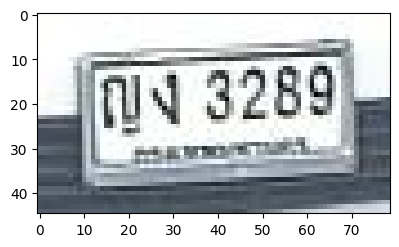


0: 384x640 1 2, 1 3, 1 8, 1 9, 1 ง, 1 ญ, 1 กรุงเทพมหานคร, 22.6ms
Speed: 1.8ms preprocess, 22.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[[30.292428970336914, 18.7171630859375, 13.51229476928711, 21.779508590698242], [40.82633590698242, 18.86312484741211, 11.937171936035156, 20.13003921508789], [18.355571746826172, 19.968830108642578, 18.472436904907227, 24.58037567138672], [64.79864501953125, 17.80550193786621, 12.8499755859375, 20.30628204345703], [48.92316436767578, 18.505861282348633, 11.278438568115234, 19.99958038330078], [40.97529602050781, 31.568233489990234, 48.651851654052734, 12.298250198364258], [56.399261474609375, 17.666465759277344, 11.266979217529297, 19.568693161010742]]
[16, 3, 22, 9, 2, 54, 8]
0ญง3289
/content/test/test/0f9fd346-8b85-4faf-a1bf-b94b42548ba2.jpg
/content/test/test/0f9fd346-8b85-4faf-a1bf-b94b42548ba2.jpg
/content/test/test/0f9fd346-8b85-4faf-a1bf-b94b42548ba2.jpg 331 205 412 252


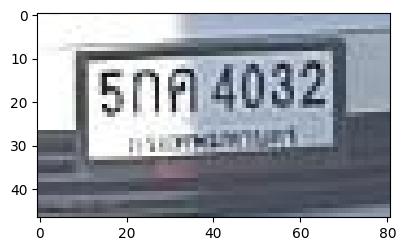


0: 384x640 1 0, 1 2, 1 3, 1 4, 1 5, 1 ก, 1 ค, 1 กรุงเทพมหานคร, 20.7ms
Speed: 1.8ms preprocess, 20.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[56.737449645996094, 16.63397789001465, 9.916130065917969, 17.539501190185547], [40.95944595336914, 30.47254180908203, 50.335105895996094, 14.103872299194336], [63.988914489746094, 16.322803497314453, 11.047054290771484, 18.642223358154297], [43.428863525390625, 17.31705093383789, 10.175212860107422, 18.21579360961914], [34.19655990600586, 18.04539680480957, 12.652273178100586, 20.218217849731445], [16.31140899658203, 17.778881072998047, 12.486437797546387, 18.873470306396484], [24.932632446289062, 18.271615982055664, 11.821861267089844, 19.04245376586914], [49.90868377685547, 16.760086059570312, 9.23160171508789, 16.790485382080078]]
[3, 54, 2, 4, 13, 5, 10, 0]
05กค4032
/content/test/test/77fcbd75-aaaa-4f6c-94ee-68aa83eceb7c.jpg
/content/test/test/77fcbd75-aaaa-4f6c-94ee-68aa83eceb7c.jpg
/content/test/test/77fcbd75-aaa

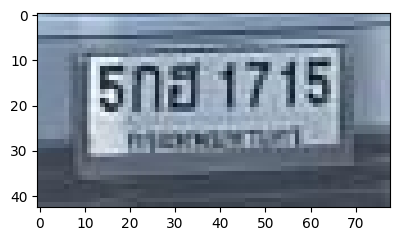


0: 384x640 2 1s, 2 5s, 1 7, 1 ก, 1 ฮ, 1 กรุงเทพมหานคร, 19.7ms
Speed: 1.7ms preprocess, 19.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[42.51002883911133, 15.764568328857422, 9.149543762207031, 18.333877563476562], [56.25806427001953, 15.360727310180664, 9.197837829589844, 18.28894805908203], [63.278839111328125, 14.626190185546875, 12.272281646728516, 20.14371109008789], [49.21748352050781, 15.324447631835938, 10.710956573486328, 19.295867919921875], [15.599390029907227, 15.867258071899414, 13.148991584777832, 19.443870544433594], [39.651039123535156, 28.536630630493164, 50.4820442199707, 12.649120330810547], [24.385011672973633, 16.192707061767578, 12.082340240478516, 19.619070053100586], [33.47221374511719, 16.109127044677734, 13.446983337402344, 20.121870040893555]]
[1, 1, 5, 7, 5, 54, 10, 53]
05กฮ1715
/content/test/test/88c37229-8a41-4e3e-a118-fe70c7e6ec75.jpg
/content/test/test/88c37229-8a41-4e3e-a118-fe70c7e6ec75.jpg
/content/test/test/88c37229-8a41-4e3

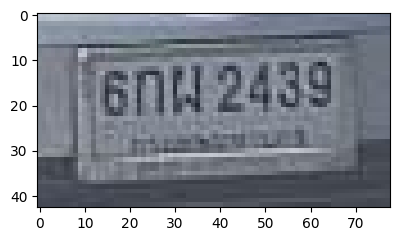


0: 384x640 1 2, 1 3, 1 4, 1 6, 1 9, 1 ก, 22.7ms
Speed: 1.9ms preprocess, 22.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[56.287750244140625, 15.051980972290039, 10.169612884521484, 20.071521759033203], [16.56459617614746, 16.397993087768555, 11.688240051269531, 20.979480743408203], [63.865234375, 15.18159008026123, 12.206607818603516, 21.141733169555664], [43.02737045288086, 16.009130477905273, 11.806167602539062, 20.272994995117188], [24.771678924560547, 16.494441986083984, 11.362630844116211, 19.452178955078125], [50.20716857910156, 16.515714645385742, 10.599609375, 20.258731842041016]]
[3, 6, 9, 2, 10, 4]
06ก2439
/content/test/test/9d4f0e2d-5742-4251-b0b3-46ab3b04a59f.jpg
/content/test/test/9d4f0e2d-5742-4251-b0b3-46ab3b04a59f.jpg
/content/test/test/9d4f0e2d-5742-4251-b0b3-46ab3b04a59f.jpg 341 155 418 197


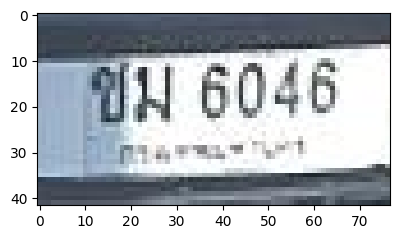


0: 352x640 1 0, 1 4, 2 6s, 1 ช, 1 กรุงเทพมหานคร, 24.0ms
Speed: 1.6ms preprocess, 24.0ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)
[[47.112449645996094, 16.59011459350586, 12.427200317382812, 20.53325080871582], [15.723310470581055, 16.333179473876953, 14.402191162109375, 22.583696365356445], [38.44114685058594, 16.48825454711914, 11.84902572631836, 20.9311466217041], [63.40869140625, 16.206392288208008, 13.419147491455078, 21.94432830810547], [38.784385681152344, 30.332962036132812, 51.37514877319336, 12.1048583984375], [55.39697265625, 16.74464225769043, 11.999382019042969, 22.26910972595215]]
[0, 19, 6, 6, 54, 4]
0ช6046
/content/test/test/b188ebb0-ba53-41c5-852c-1448c16e76b4.jpg
/content/test/test/b188ebb0-ba53-41c5-852c-1448c16e76b4.jpg
/content/test/test/b188ebb0-ba53-41c5-852c-1448c16e76b4.jpg 328 158 408 204


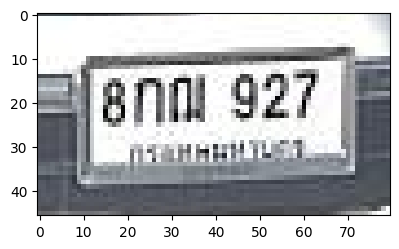


0: 384x640 1 2, 1 7, 1 8, 1 9, 1 ก, 1 ฌ, 1 กรุงเทพมหานคร, 21.8ms
Speed: 2.0ms preprocess, 21.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[62.025962829589844, 18.942983627319336, 11.712753295898438, 19.50436019897461], [46.94887924194336, 19.202072143554688, 11.536331176757812, 18.95928955078125], [54.47721862792969, 19.32781219482422, 10.605316162109375, 18.885719299316406], [25.515050888061523, 20.278030395507812, 11.957942962646484, 19.80963134765625], [16.84874725341797, 20.584434509277344, 12.038811683654785, 19.404258728027344], [35.17169952392578, 19.508914947509766, 14.153175354003906, 19.310302734375], [41.06169509887695, 31.8941650390625, 50.79120635986328, 13.545639038085938]]
[7, 9, 2, 10, 8, 21, 54]
08กฌ927
/content/test/test/e8602f97-1ebf-4106-b65a-1027beba53cb.jpg
/content/test/test/e8602f97-1ebf-4106-b65a-1027beba53cb.jpg
/content/test/test/e8602f97-1ebf-4106-b65a-1027beba53cb.jpg 292 173 365 219


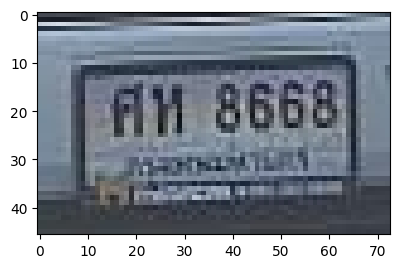


0: 416x640 2 6s, 2 8s, 1 ศ, 1 ห, 1 กรุงเทพมหานคร, 25.4ms
Speed: 1.8ms preprocess, 25.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
[[16.9006290435791, 18.737483978271484, 15.229827880859375, 21.993432998657227], [39.098228454589844, 19.33965301513672, 10.250919342041016, 18.27260971069336], [46.443626403808594, 18.71432876586914, 9.644641876220703, 18.374784469604492], [27.841163635253906, 19.6783447265625, 12.354658126831055, 19.220197677612305], [37.16227722167969, 31.811294555664062, 46.35160446166992, 10.958967208862305], [52.98716354370117, 17.794139862060547, 9.762886047363281, 19.907621383666992], [60.45722961425781, 18.082895278930664, 11.606433868408203, 20.37225341796875]]
[47, 8, 6, 50, 54, 6, 8]
0ศห8668
/content/test/test/2ad5f503-b91c-4285-bb91-e1e1d5af5b19.jpg
/content/test/test/2ad5f503-b91c-4285-bb91-e1e1d5af5b19.jpg
/content/test/test/2ad5f503-b91c-4285-bb91-e1e1d5af5b19.jpg 324 199 400 246


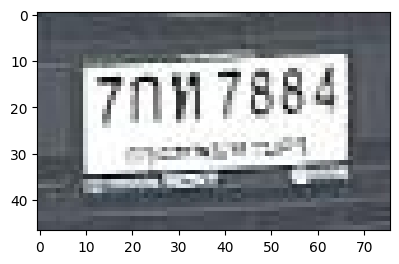


0: 416x640 1 4, 2 7s, 2 8s, 1 ก, 1 กรุงเทพมหานคร, 19.9ms
Speed: 1.9ms preprocess, 19.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
[[38.74608612060547, 29.5234317779541, 49.59498596191406, 12.263248443603516], [63.356658935546875, 16.56024932861328, 11.977336883544922, 19.911571502685547], [41.47500228881836, 17.580406188964844, 10.451080322265625, 19.63279151916504], [48.22627258300781, 17.211528778076172, 10.118061065673828, 18.022775650024414], [23.538291931152344, 18.48383903503418, 12.367729187011719, 19.077613830566406], [55.5372314453125, 17.037012100219727, 10.476512908935547, 17.647464752197266], [15.368980407714844, 18.56114387512207, 11.848694801330566, 19.883384704589844]]
[54, 4, 7, 8, 10, 8, 7]
07ก7884
/content/test/test/93119396-955b-4459-9d97-d86b1400fd18.jpg
/content/test/test/93119396-955b-4459-9d97-d86b1400fd18.jpg
/content/test/test/93119396-955b-4459-9d97-d86b1400fd18.jpg 339 189 423 238


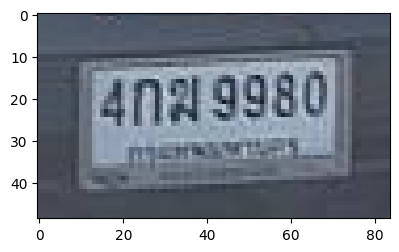


0: 384x640 1 0, 1 4, 1 8, 2 9s, 1 ก, 1 ฆ, 1 กรุงเทพมหานคร, 20.4ms
Speed: 2.0ms preprocess, 20.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
[[45.128570556640625, 20.37028694152832, 11.131946563720703, 19.258792877197266], [52.36400604248047, 19.688276290893555, 9.984291076660156, 20.018592834472656], [35.84677505493164, 20.17847442626953, 13.352121353149414, 20.97028350830078], [18.058509826660156, 21.105728149414062, 12.17254638671875, 20.62765884399414], [42.80756378173828, 33.46290969848633, 52.345088958740234, 13.938974380493164], [59.18416213989258, 19.164663314819336, 10.676002502441406, 20.506328582763672], [26.186908721923828, 20.694997787475586, 12.48859977722168, 21.03704833984375], [67.3401870727539, 19.11693572998047, 13.200241088867188, 21.917430877685547]]
[9, 9, 15, 4, 54, 8, 10, 0]
04กฆ9980
/content/test/test/f23a472d-6d37-4e21-8c5b-ed8bc46b6ffe.jpg
/content/test/test/f23a472d-6d37-4e21-8c5b-ed8bc46b6ffe.jpg
/content/test/test/f23a472d-6d37-4e21-

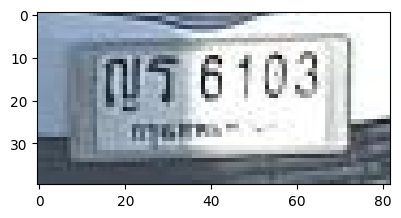


0: 320x640 1 1, 1 3, 1 6, 1 ญ, 1 ร, 1 กรุงเทพมหานคร, 20.4ms
Speed: 1.4ms preprocess, 20.4ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)
[[48.748573303222656, 14.733972549438477, 9.666709899902344, 19.633697509765625], [19.029077529907227, 15.726557731628418, 16.907459259033203, 23.553319931030273], [63.775428771972656, 14.794496536254883, 11.998611450195312, 20.77734375], [40.59050750732422, 14.965863227844238, 11.45560073852539, 19.74680519104004], [30.21062469482422, 15.091001510620117, 13.592489242553711, 20.744728088378906], [41.2225227355957, 27.986621856689453, 50.609642028808594, 12.72266960144043]]
[1, 22, 3, 6, 44, 54]
0ญร613
/content/test/test/875988f6-a00e-45e1-9b47-485d438a98c9.jpg
/content/test/test/875988f6-a00e-45e1-9b47-485d438a98c9.jpg
/content/test/test/875988f6-a00e-45e1-9b47-485d438a98c9.jpg 341 157 418 203


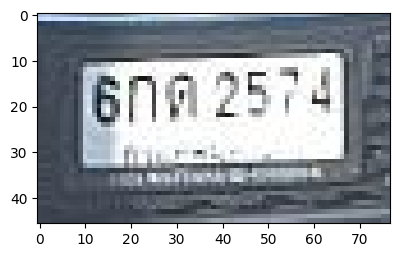


0: 384x640 1 2, 1 4, 1 5, 1 6, 1 7, 1 ก, 1 ต, 20.7ms
Speed: 2.2ms preprocess, 20.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[14.156102180480957, 18.31789779663086, 12.949930191040039, 20.43992042541504], [41.48846435546875, 18.143674850463867, 11.101985931396484, 18.293930053710938], [55.011375427246094, 16.998123168945312, 10.40921401977539, 18.939327239990234], [48.42186737060547, 17.282506942749023, 10.19482421875, 18.44686508178711], [32.18686294555664, 18.527738571166992, 12.744590759277344, 19.81616973876953], [23.047264099121094, 18.706680297851562, 11.92763900756836, 19.468154907226562], [63.169918060302734, 16.471309661865234, 12.000205993652344, 18.56260871887207]]
[6, 2, 7, 5, 30, 10, 4]
06กต2574
/content/test/test/d2329f01-9944-48c1-a128-3c89f1db2e19.jpg
/content/test/test/d2329f01-9944-48c1-a128-3c89f1db2e19.jpg
/content/test/test/d2329f01-9944-48c1-a128-3c89f1db2e19.jpg 338 213 414 256


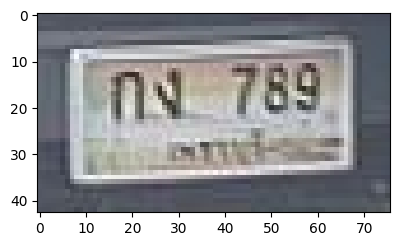


0: 384x640 1 7, 1 8, 1 9, 1 ก, 1 ง, 19.2ms
Speed: 1.5ms preprocess, 19.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[[44.54689025878906, 16.730026245117188, 11.353645324707031, 19.157360076904297], [19.299148559570312, 17.938249588012695, 13.622245788574219, 19.46001434326172], [59.25813293457031, 16.315738677978516, 11.195938110351562, 19.948745727539062], [29.538820266723633, 17.50666046142578, 12.161083221435547, 18.515214920043945], [51.740726470947266, 16.32066535949707, 10.627784729003906, 19.349966049194336]]
[7, 10, 9, 16, 8]
0กง789
/content/test/test/e0a88889-439d-4a01-b437-86c840483732.jpg
/content/test/test/e0a88889-439d-4a01-b437-86c840483732.jpg
/content/test/test/e0a88889-439d-4a01-b437-86c840483732.jpg 277 191 352 236


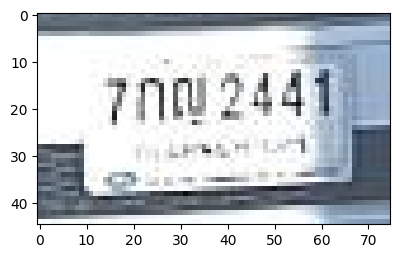


0: 384x640 1 1, 1 2, 2 4s, 1 7, 1 ก, 1 ญ, 1 กรุงเทพมหานคร, 20.7ms
Speed: 2.7ms preprocess, 20.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
[[41.760005950927734, 18.06239128112793, 10.890663146972656, 18.509445190429688], [62.23080825805664, 17.036014556884766, 11.186820983886719, 19.627817153930664], [55.232093811035156, 17.48377799987793, 10.912334442138672, 20.683834075927734], [32.789459228515625, 18.336793899536133, 14.428281784057617, 19.130237579345703], [24.386917114257812, 18.317676544189453, 12.235757827758789, 19.279582977294922], [48.347450256347656, 17.842111587524414, 10.281501770019531, 19.131664276123047], [38.66504669189453, 29.86026382446289, 49.04764175415039, 13.460405349731445], [16.017597198486328, 19.028888702392578, 12.259550094604492, 21.798675537109375]]
[2, 1, 4, 22, 10, 4, 54, 7]
07กญ2441
/content/test/test/9b321095-4f4b-4ee6-a0b3-b4fb7a54504c.jpg
/content/test/test/9b321095-4f4b-4ee6-a0b3-b4fb7a54504c.jpg
/content/test/test/9b321095-

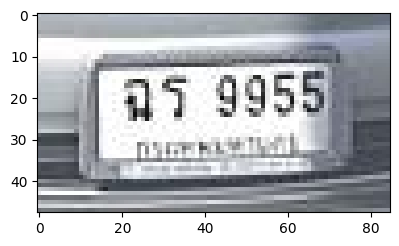


0: 384x640 2 5s, 2 9s, 1 ฉ, 1 ร, 1 กรุงเทพมหานคร, 18.7ms
Speed: 1.5ms preprocess, 18.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[67.2572021484375, 19.050710678100586, 12.318180084228516, 20.145679473876953], [34.428627014160156, 20.38287353515625, 13.149433135986328, 19.1912899017334], [53.39741897583008, 19.83841323852539, 10.253684997558594, 18.457672119140625], [60.01884460449219, 19.29498291015625, 10.964309692382812, 18.66962242126465], [24.17638397216797, 20.307552337646484, 15.022420883178711, 19.812715530395508], [43.54531478881836, 32.52088928222656, 48.65947723388672, 12.967416763305664], [46.07524490356445, 19.777103424072266, 10.785423278808594, 18.426437377929688]]
[5, 44, 9, 5, 18, 54, 9]
0ฉร9955
/content/test/test/fa566e6d-ac1f-47c2-b2ec-fb7afd073d29.jpg
/content/test/test/fa566e6d-ac1f-47c2-b2ec-fb7afd073d29.jpg
/content/test/test/fa566e6d-ac1f-47c2-b2ec-fb7afd073d29.jpg 330 154 402 191


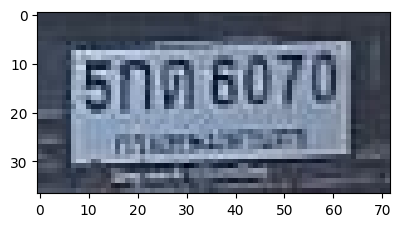


0: 352x640 2 0s, 1 5, 1 6, 1 7, 1 ก, 1 ต, 1 กรุงเทพมหานคร, 20.2ms
Speed: 1.5ms preprocess, 20.2ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)
[[11.414268493652344, 14.35153579711914, 12.073356628417969, 18.67784881591797], [51.71476364135742, 13.745006561279297, 9.667755126953125, 18.1402587890625], [20.12575912475586, 14.977518081665039, 10.970926284790039, 17.436237335205078], [36.167510986328125, 26.3147029876709, 47.61048889160156, 10.756019592285156], [28.790428161621094, 14.660295486450195, 11.753250122070312, 17.5045166015625], [37.82466125488281, 13.827796936035156, 10.470588684082031, 17.550540924072266], [45.035926818847656, 14.02984619140625, 10.099716186523438, 16.3648681640625], [59.26296615600586, 13.465112686157227, 11.344718933105469, 18.799480438232422]]
[5, 7, 10, 54, 30, 6, 0, 0]
05กต6070
/content/test/test/b94f0dee-c965-4dad-baf7-3b7eb12f6fec.jpg
/content/test/test/b94f0dee-c965-4dad-baf7-3b7eb12f6fec.jpg
/content/test/test/b94f0dee-c965-4dad-b

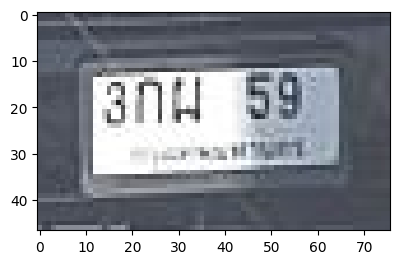


0: 416x640 1 3, 1 5, 1 9, 1 ก, 1 ผ, 1 กรุงเทพมหานคร, 20.8ms
Speed: 1.7ms preprocess, 20.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
[[16.296775817871094, 19.209983825683594, 11.670467376708984, 18.58189582824707], [55.2226448059082, 18.189756393432617, 10.233245849609375, 17.034618377685547], [38.5621223449707, 30.15146827697754, 47.385765075683594, 10.498645782470703], [24.235105514526367, 19.09039306640625, 10.411483764648438, 18.09334945678711], [47.30244445800781, 17.264171600341797, 11.63956069946289, 19.103702545166016], [33.149471282958984, 18.494029998779297, 13.715276718139648, 20.227218627929688]]
[3, 9, 54, 10, 5, 37]
03กผ59
/content/test/test/111f49ff-a69c-4b0e-a5eb-0c5fd4a8fbac.jpg
/content/test/test/111f49ff-a69c-4b0e-a5eb-0c5fd4a8fbac.jpg
/content/test/test/111f49ff-a69c-4b0e-a5eb-0c5fd4a8fbac.jpg 340 225 421 266


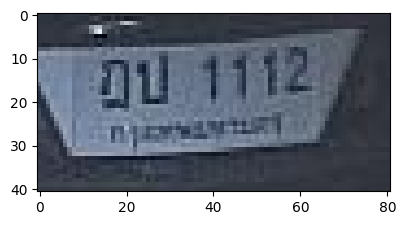


0: 352x640 3 1s, 1 2, 1 ฎ, 1 บ, 1 กรุงเทพมหานคร, 20.5ms
Speed: 1.4ms preprocess, 20.5ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)
[[53.65281677246094, 13.575100898742676, 8.91241455078125, 17.059194564819336], [47.003326416015625, 14.445711135864258, 8.953678131103516, 17.11418914794922], [39.595703125, 14.586546897888184, 9.473384857177734, 17.772565841674805], [37.16484832763672, 27.21013641357422, 49.26397705078125, 11.059991836547852], [60.76812744140625, 13.23812484741211, 11.954425811767578, 18.32030487060547], [27.253742218017578, 14.145770072937012, 12.694374084472656, 20.125059127807617], [17.338890075683594, 15.645671844482422, 13.464496612548828, 19.617549896240234]]
[1, 1, 1, 54, 2, 35, 23]
0ฎบ1112
/content/test/test/598f47d6-0f96-46e0-8a7b-61649af07c9e.jpg
/content/test/test/598f47d6-0f96-46e0-8a7b-61649af07c9e.jpg
/content/test/test/598f47d6-0f96-46e0-8a7b-61649af07c9e.jpg 326 183 406 229


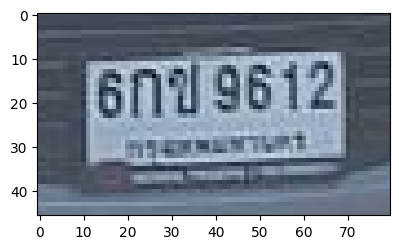


0: 384x640 1 1, 2 6s, 1 9, 1 ก, 1 ข, 1 กรุงเทพมหานคร, 19.7ms
Speed: 1.5ms preprocess, 19.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)
[[57.937950134277344, 16.9645938873291, 9.121574401855469, 19.558597564697266], [34.039039611816406, 16.536880493164062, 12.889829635620117, 21.44452667236328], [50.649314880371094, 16.267589569091797, 10.586013793945312, 20.138381958007812], [43.40691375732422, 16.968385696411133, 10.920974731445312, 20.033885955810547], [15.582130432128906, 17.639312744140625, 13.15115737915039, 20.75354766845703], [40.899654388427734, 30.154869079589844, 52.042884826660156, 12.028663635253906], [25.025222778320312, 17.66957664489746, 12.290367126464844, 20.26242446899414]]
[1, 11, 6, 9, 6, 54, 10]
06กข961
/content/test/test/411fd4b3-ad03-4135-a637-0a6f1449ebcf.jpg
/content/test/test/411fd4b3-ad03-4135-a637-0a6f1449ebcf.jpg
/content/test/test/411fd4b3-ad03-4135-a637-0a6f1449ebcf.jpg 308 210 385 251


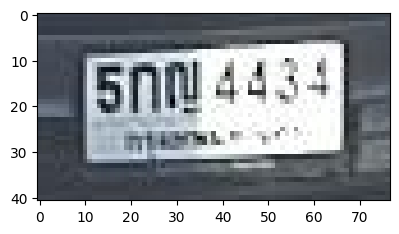


0: 352x640 1 3, 2 4s, 1 5, 1 ก, 1 ญ, 1 กรุงเทพมหานคร, 19.8ms
Speed: 1.4ms preprocess, 19.8ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)
[[32.652034759521484, 15.71882152557373, 15.072957992553711, 20.60524559020996], [55.319091796875, 14.486299514770508, 9.403675079345703, 18.05123519897461], [15.08456802368164, 15.976812362670898, 12.837775230407715, 19.424217224121094], [42.099918365478516, 14.664793014526367, 9.644805908203125, 17.940052032470703], [48.94813537597656, 14.304152488708496, 10.57790756225586, 18.539121627807617], [23.422292709350586, 15.92184829711914, 11.343353271484375, 19.336471557617188], [39.373165130615234, 26.632980346679688, 50.43429946899414, 10.789953231811523]]
[22, 3, 5, 4, 4, 10, 54]
05กญ443
/content/test/test/cc2a370f-a477-4882-8b37-f41d806c9c79.jpg
/content/test/test/cc2a370f-a477-4882-8b37-f41d806c9c79.jpg
/content/test/test/cc2a370f-a477-4882-8b37-f41d806c9c79.jpg 314 192 391 238


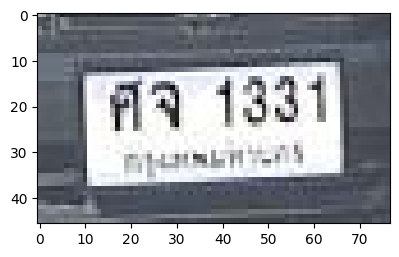


0: 384x640 2 1s, 2 3s, 1 ศ, 1 กรุงเทพมหานคร, 20.0ms
Speed: 1.5ms preprocess, 20.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[[47.799049377441406, 19.202598571777344, 9.325298309326172, 17.317920684814453], [54.89990997314453, 18.786672592163086, 9.94369888305664, 18.01668930053711], [19.08506202697754, 20.274429321289062, 13.753251075744629, 19.208850860595703], [41.63153076171875, 19.375713348388672, 9.19095230102539, 17.864959716796875], [62.53690719604492, 18.99253273010254, 10.745765686035156, 18.43844985961914], [39.013736724853516, 32.0776481628418, 48.743099212646484, 10.66387939453125]]
[3, 3, 47, 1, 1, 54]
0ศ1331
/content/test/test/4de1b2f3-6276-40d3-8be4-30b18560c12c.jpg
/content/test/test/4de1b2f3-6276-40d3-8be4-30b18560c12c.jpg
/content/test/test/4de1b2f3-6276-40d3-8be4-30b18560c12c.jpg 328 197 408 245


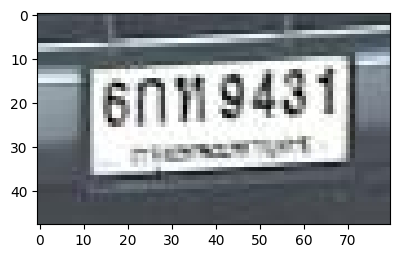


0: 384x640 1 1, 1 3, 1 4, 1 6, 1 9, 1 ก, 1 กรุงเทพมหานคร, 20.9ms
Speed: 1.5ms preprocess, 20.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[[59.13225555419922, 17.662460327148438, 10.754058837890625, 20.759765625], [67.11366271972656, 18.197547912597656, 12.156539916992188, 21.597084045410156], [52.784820556640625, 18.62448501586914, 11.633926391601562, 21.453880310058594], [44.667415618896484, 18.95764923095703, 11.493431091308594, 19.971412658691406], [26.157699584960938, 20.225059509277344, 12.532745361328125, 20.4637451171875], [42.57313537597656, 31.227758407592773, 52.517181396484375, 11.33115005493164], [16.844139099121094, 20.131074905395508, 13.605941772460938, 20.68978500366211]]
[3, 1, 4, 9, 10, 54, 6]
06ก9431
/content/test/test/68e867c9-5507-4fdb-86a1-bf6f1a0e501d.jpg
/content/test/test/68e867c9-5507-4fdb-86a1-bf6f1a0e501d.jpg
/content/test/test/68e867c9-5507-4fdb-86a1-bf6f1a0e501d.jpg 327 179 410 228


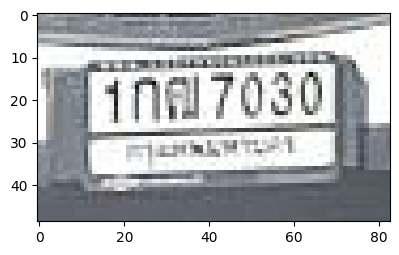


0: 384x640 2 0s, 1 1, 1 3, 1 7, 1 ก, 1 ฒ, 1 กรุงเทพมหานคร, 19.1ms
Speed: 2.2ms preprocess, 19.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
[[35.05106735229492, 18.805681228637695, 13.699991226196289, 20.049835205078125], [18.33587074279785, 20.42380142211914, 10.256529808044434, 18.621353149414062], [25.873491287231445, 19.766767501831055, 12.266193389892578, 19.531238555908203], [43.964111328125, 19.209026336669922, 10.848396301269531, 20.12009620666504], [41.6005859375, 31.735246658325195, 50.89057540893555, 12.538875579833984], [64.87684631347656, 19.29656410217285, 11.69857406616211, 18.36072540283203], [57.85993194580078, 19.344772338867188, 9.984275817871094, 18.988719940185547], [51.01201629638672, 18.8668212890625, 10.65835952758789, 20.03233528137207]]
[27, 1, 10, 7, 54, 0, 3, 0]
01กฒ7030
/content/test/test/0023713c-801f-4c95-a650-7519a5b791bf.jpg
/content/test/test/0023713c-801f-4c95-a650-7519a5b791bf.jpg
/content/test/test/0023713c-801f-4c95-a650-751

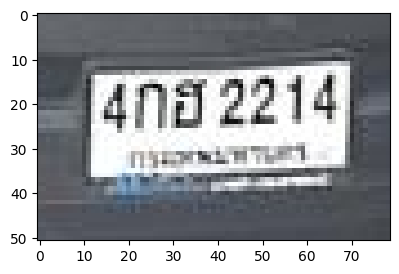


0: 416x640 1 1, 2 2s, 1 4, 1 ก, 1 ฮ, 1 กรุงเทพมหานคร, 20.0ms
Speed: 1.6ms preprocess, 20.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
[[58.604331970214844, 19.60692596435547, 9.446857452392578, 18.747821807861328], [43.80633544921875, 20.07870864868164, 10.70407485961914, 19.156517028808594], [65.98603057861328, 19.28093147277832, 12.583465576171875, 19.728965759277344], [51.20066833496094, 19.853368759155273, 10.224205017089844, 18.196704864501953], [25.831388473510742, 20.721298217773438, 12.40072250366211, 19.93930435180664], [40.38573455810547, 32.016883850097656, 50.32691955566406, 10.81661605834961], [34.82903289794922, 20.54580307006836, 13.84562873840332, 21.15099334716797]]
[1, 2, 4, 2, 10, 54, 53]
0กฮ2214
/content/test/test/566dcd08-00d5-4101-90f4-6c24472f1327.jpg
/content/test/test/566dcd08-00d5-4101-90f4-6c24472f1327.jpg
/content/test/test/566dcd08-00d5-4101-90f4-6c24472f1327.jpg 323 215 410 256


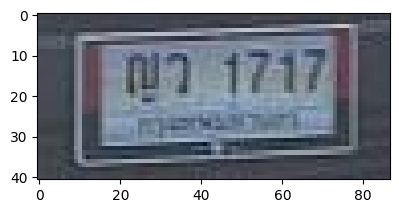


0: 320x640 2 1s, 2 7s, 1 ญ, 1 ว, 1 กรุงเทพมหานคร, 20.2ms
Speed: 1.4ms preprocess, 20.2ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)
[[48.07453918457031, 15.024468421936035, 10.008846282958984, 18.76279640197754], [25.933490753173828, 15.290444374084473, 15.470634460449219, 20.037492752075195], [62.221412658691406, 14.638774871826172, 9.676959991455078, 18.308258056640625], [69.14920806884766, 14.528745651245117, 11.710037231445312, 20.352279663085938], [36.17230987548828, 15.060434341430664, 12.684236526489258, 19.243507385253906], [45.0025749206543, 27.395645141601562, 49.10063934326172, 9.421180725097656], [54.79684066772461, 14.493504524230957, 10.925262451171875, 19.137617111206055]]
[1, 22, 1, 7, 46, 54, 7]
0ญว1717
/content/test/test/fc04327b-5929-4804-a283-d68cdd2af5f2.jpg
/content/test/test/fc04327b-5929-4804-a283-d68cdd2af5f2.jpg
/content/test/test/fc04327b-5929-4804-a283-d68cdd2af5f2.jpg 321 203 404 252


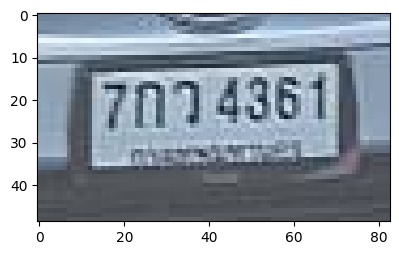


0: 384x640 1 1, 1 3, 1 4, 1 6, 1 7, 1 ก, 1 ว, 1 กรุงเทพมหานคร, 20.3ms
Speed: 1.5ms preprocess, 20.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[36.20789337158203, 20.34659194946289, 12.961023330688477, 19.580339431762695], [52.39569091796875, 19.53621482849121, 9.901054382324219, 18.935134887695312], [17.744857788085938, 21.16884994506836, 12.58659839630127, 20.865161895751953], [67.31262969970703, 19.55804443359375, 11.490222930908203, 19.75333023071289], [59.30495834350586, 19.33262825012207, 10.729286193847656, 19.5401611328125], [45.659095764160156, 20.423748016357422, 10.794807434082031, 19.050710678100586], [26.88031578063965, 20.784563064575195, 13.020740509033203, 19.909526824951172], [42.160404205322266, 34.21336364746094, 52.35470962524414, 13.041303634643555]]
[46, 3, 7, 1, 6, 4, 10, 54]
07กว4361
/content/test/test/218921c9-151f-4a4e-bc20-e6df49634414.jpg
/content/test/test/218921c9-151f-4a4e-bc20-e6df49634414.jpg
/content/test/test/218921c9-151f-4a

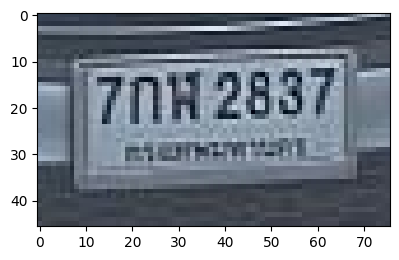


0: 416x640 1 2, 1 3, 2 7s, 1 8, 1 ก, 1 ฬ, 1 กรุงเทพมหานคร, 19.7ms
Speed: 1.8ms preprocess, 19.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
[[55.05204772949219, 17.049152374267578, 9.786243438720703, 18.116809844970703], [15.404285430908203, 18.396251678466797, 11.52689266204834, 18.536596298217773], [41.13972473144531, 17.562889099121094, 10.342155456542969, 18.446121215820312], [48.35420227050781, 17.251296997070312, 10.063236236572266, 18.301597595214844], [62.72190856933594, 16.891159057617188, 11.819534301757812, 19.503664016723633], [38.468841552734375, 30.21904182434082, 48.88166427612305, 13.174640655517578], [23.504066467285156, 18.164474487304688, 11.268840789794922, 18.09378433227539], [32.152000427246094, 18.17446517944336, 12.4642333984375, 18.303712844848633]]
[3, 7, 2, 8, 7, 54, 10, 51]
07กฬ2837
/content/test/test/cbb21dcb-b7a7-4861-9fdc-0a689a4f9e06.jpg
/content/test/test/cbb21dcb-b7a7-4861-9fdc-0a689a4f9e06.jpg
/content/test/test/cbb21dcb-b7a7-4

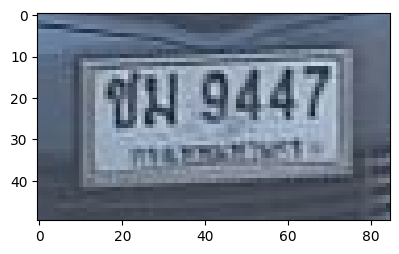


0: 384x640 2 4s, 1 7, 1 9, 1 ช, 1 กรุงเทพมหานคร, 19.4ms
Speed: 1.4ms preprocess, 19.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[[59.67113494873047, 19.591428756713867, 12.09478759765625, 22.55762481689453], [69.01527404785156, 18.493101119995117, 14.644977569580078, 23.792400360107422], [51.605125427246094, 20.295631408691406, 10.947223663330078, 21.977493286132812], [18.546066284179688, 19.529977798461914, 17.21807861328125, 24.954265594482422], [43.16761016845703, 20.223609924316406, 13.220073699951172, 22.202959060668945], [44.6686897277832, 34.55437469482422, 55.19696807861328, 14.493762969970703]]
[4, 7, 4, 19, 9, 54]
0ช9447
/content/test/test/86a9ccc0-dab5-4602-83e4-ed4dbb5a264d.jpg
/content/test/test/86a9ccc0-dab5-4602-83e4-ed4dbb5a264d.jpg
/content/test/test/86a9ccc0-dab5-4602-83e4-ed4dbb5a264d.jpg 305 155 393 209


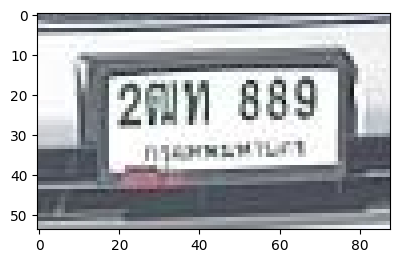


0: 416x640 1 2, 2 8s, 1 9, 1 ฒ, 1 ท, 1 กรุงเทพมหานคร, 19.6ms
Speed: 1.6ms preprocess, 19.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
[[32.033145904541016, 22.1672306060791, 14.020881652832031, 20.73031234741211], [41.34962463378906, 22.39590072631836, 14.391780853271484, 21.5950927734375], [52.544898986816406, 22.00019645690918, 11.439224243164062, 19.098857879638672], [60.36199951171875, 21.77875328063965, 11.03009033203125, 19.01434326171875], [68.34811401367188, 21.89430046081543, 12.430496215820312, 20.051162719726562], [46.92841339111328, 34.68313980102539, 52.23716735839844, 14.27484130859375], [23.609169006347656, 23.225360870361328, 14.661165237426758, 20.83312225341797]]
[27, 32, 8, 8, 9, 54, 2]
02ฒท889
/content/test/test/14210ba2-3c5f-4d8e-9ba7-8b4dc84ce70b.jpg
/content/test/test/14210ba2-3c5f-4d8e-9ba7-8b4dc84ce70b.jpg
/content/test/test/14210ba2-3c5f-4d8e-9ba7-8b4dc84ce70b.jpg 329 207 406 255


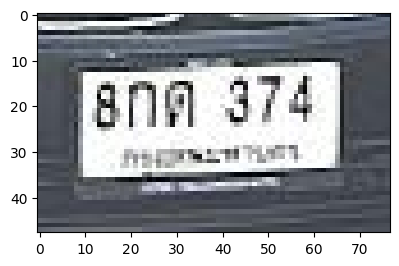


0: 416x640 1 3, 1 4, 1 7, 1 8, 1 ก, 1 กรุงเทพมหานคร, 18.9ms
Speed: 1.6ms preprocess, 18.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
[[59.03852081298828, 18.932376861572266, 11.59299087524414, 19.76812744140625], [50.98878479003906, 18.818954467773438, 10.051570892333984, 19.298812866210938], [14.24390983581543, 19.967010498046875, 11.59586238861084, 18.562057495117188], [43.877220153808594, 18.504322052001953, 10.842811584472656, 19.013002395629883], [38.08124923706055, 31.3897705078125, 48.495452880859375, 11.139932632446289], [22.886592864990234, 20.149877548217773, 11.311136245727539, 18.144290924072266]]
[4, 7, 8, 3, 54, 10]
08ก374
/content/test/test/6e9306cb-e443-4f71-9b99-fef2bccc5d0f.jpg
/content/test/test/6e9306cb-e443-4f71-9b99-fef2bccc5d0f.jpg
/content/test/test/6e9306cb-e443-4f71-9b99-fef2bccc5d0f.jpg 342 204 413 241


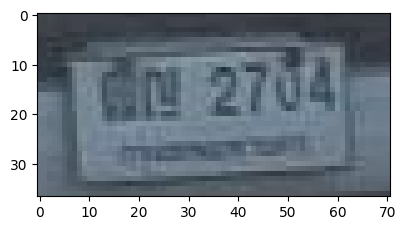


0: 352x640 1 2, 1 4, 1 7, 1 ญ, 1 ฒ, 1 กรุงเทพมหานคร, 19.7ms
Speed: 1.5ms preprocess, 19.7ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)
[[44.139991760253906, 14.910653114318848, 9.7147216796875, 18.13886833190918], [37.439613342285156, 15.875212669372559, 11.25796127319336, 17.9023380279541], [25.8126220703125, 15.42959213256836, 13.362199783325195, 18.190452575683594], [58.39165496826172, 14.788508415222168, 11.633377075195312, 19.731565475463867], [15.547581672668457, 15.034574508666992, 13.545778274536133, 20.0897216796875], [36.44312286376953, 27.20744514465332, 47.61975860595703, 9.362194061279297]]
[7, 2, 22, 4, 27, 54]
0ฒญ274
/content/test/test/643c8913-e7b0-4711-8416-ffa57eeb01ba.jpg
/content/test/test/643c8913-e7b0-4711-8416-ffa57eeb01ba.jpg
/content/test/test/643c8913-e7b0-4711-8416-ffa57eeb01ba.jpg 323 209 401 256


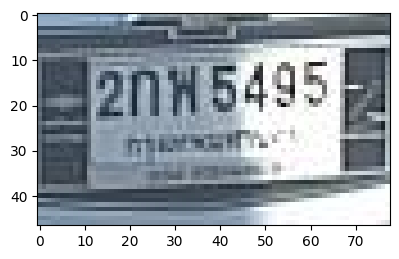


0: 416x640 1 2, 1 4, 2 5s, 1 9, 1 ก, 1 กรุงเทพมหานคร, 20.2ms
Speed: 1.6ms preprocess, 20.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
[[62.372013092041016, 15.441021919250488, 11.431282043457031, 19.36775779724121], [16.122610092163086, 17.77561378479004, 11.5354642868042, 19.167396545410156], [48.928077697753906, 16.027925491333008, 9.634105682373047, 19.499794006347656], [41.753196716308594, 15.956829071044922, 11.564319610595703, 18.46672821044922], [23.982440948486328, 17.273929595947266, 11.095455169677734, 18.79767417907715], [39.494712829589844, 29.290016174316406, 49.78239440917969, 12.098787307739258], [55.492244720458984, 16.060754776000977, 9.437858581542969, 18.282472610473633]]
[5, 2, 4, 5, 10, 54, 9]
02ก5495
/content/test/test/5ec06be6-9ab0-4ee9-aec1-fc75b2041438.jpg
/content/test/test/5ec06be6-9ab0-4ee9-aec1-fc75b2041438.jpg
/content/test/test/5ec06be6-9ab0-4ee9-aec1-fc75b2041438.jpg 322 214 403 257


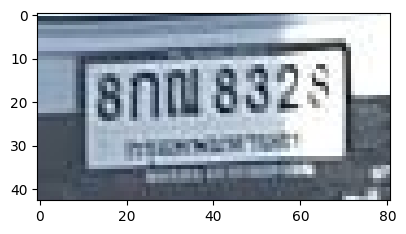


0: 352x640 1 2, 1 3, 2 8s, 1 ก, 1 กรุงเทพมหานคร, 19.9ms
Speed: 1.7ms preprocess, 19.9ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)
[[51.011878967285156, 17.908113479614258, 10.63864517211914, 18.629356384277344], [58.10084533691406, 17.399879455566406, 10.764949798583984, 19.348756790161133], [15.769899368286133, 18.839691162109375, 12.77725887298584, 19.868515014648438], [40.44571304321289, 29.92837905883789, 50.253719329833984, 10.253671646118164], [24.74355697631836, 18.934419631958008, 11.768707275390625, 19.09687042236328], [43.556610107421875, 17.551204681396484, 11.098823547363281, 19.35793685913086]]
[3, 2, 8, 54, 10, 8]
08ก832
/content/test/test/fcce9ceb-6160-4a26-80bf-ab6a0371a308.jpg
/content/test/test/fcce9ceb-6160-4a26-80bf-ab6a0371a308.jpg
/content/test/test/fcce9ceb-6160-4a26-80bf-ab6a0371a308.jpg 317 187 402 232


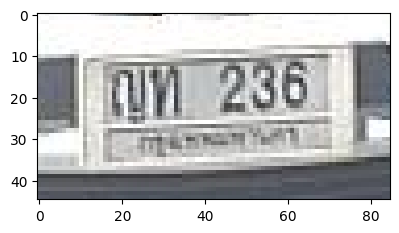


0: 352x640 1 2, 1 3, 1 6, 1 ญ, 2 ทs, 19.3ms
Speed: 1.4ms preprocess, 19.3ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)
[[54.97137451171875, 18.001012802124023, 11.061321258544922, 21.02096939086914], [21.683578491210938, 19.415889739990234, 16.538942337036133, 20.169357299804688], [32.33953094482422, 19.598371505737305, 14.395719528198242, 22.984222412109375], [47.09680938720703, 18.874143600463867, 13.516311645507812, 21.632186889648438], [62.81370544433594, 17.46965789794922, 12.33255386352539, 21.65369987487793], [32.329017639160156, 19.537752151489258, 14.119407653808594, 23.3726749420166]]
[3, 22, 32, 2, 6, 32]
0ญทท236
/content/test/test/eea5ad4f-ebc6-48b2-9c46-287f71dc2d6b.jpg
/content/test/test/eea5ad4f-ebc6-48b2-9c46-287f71dc2d6b.jpg
/content/test/test/eea5ad4f-ebc6-48b2-9c46-287f71dc2d6b.jpg 320 179 395 221


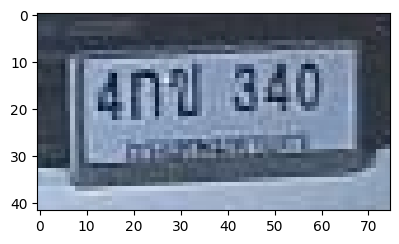


0: 384x640 1 0, 1 3, 2 4s, 1 ก, 1 ข, 1 กรุงเทพมหานคร, 19.4ms
Speed: 1.5ms preprocess, 19.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[[32.30879211425781, 15.7192964553833, 12.37675666809082, 19.17706871032715], [51.59336853027344, 15.296029090881348, 10.1239013671875, 18.03331184387207], [37.70420837402344, 29.163454055786133, 48.89028549194336, 12.675655364990234], [23.316211700439453, 16.47368049621582, 11.308256149291992, 19.228498458862305], [44.132171630859375, 15.54703140258789, 11.418170928955078, 18.429996490478516], [58.43010330200195, 15.016519546508789, 10.694503784179688, 18.90542221069336], [15.501721382141113, 17.014856338500977, 11.39845085144043, 18.284273147583008]]
[11, 4, 54, 10, 3, 0, 4]
04กข340
/content/test/test/306de884-6b40-435c-94f3-7e88bc0bbc44.jpg
/content/test/test/306de884-6b40-435c-94f3-7e88bc0bbc44.jpg
/content/test/test/306de884-6b40-435c-94f3-7e88bc0bbc44.jpg 337 186 413 232


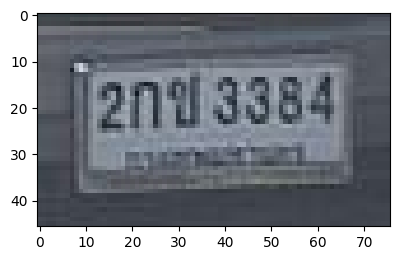


0: 416x640 1 2, 2 3s, 1 4, 1 8, 1 ก, 1 ข, 1 กรุงเทพมหานคร, 19.5ms
Speed: 1.5ms preprocess, 19.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
[[41.092041015625, 18.678184509277344, 10.265525817871094, 18.460342407226562], [47.99993896484375, 18.188983917236328, 10.001945495605469, 19.378612518310547], [62.90907287597656, 18.643695831298828, 12.502120971679688, 20.39134407043457], [15.244023323059082, 20.12114715576172, 12.566213607788086, 19.59529685974121], [55.01947021484375, 18.13947296142578, 10.895343780517578, 19.803491592407227], [23.610084533691406, 19.01085090637207, 11.260578155517578, 19.675888061523438], [38.708683013916016, 31.55353546142578, 50.431358337402344, 12.224885940551758], [32.59644317626953, 17.903148651123047, 12.401046752929688, 21.187284469604492]]
[3, 3, 4, 2, 8, 10, 54, 11]
02กข3384
/content/test/test/4a317396-69f4-4ad1-b424-bd051b0fd03f.jpg
/content/test/test/4a317396-69f4-4ad1-b424-bd051b0fd03f.jpg
/content/test/test/4a317396-69f4-4a

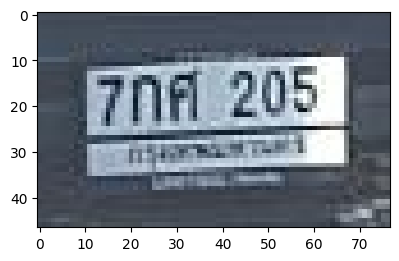


0: 416x640 1 2, 1 5, 1 7, 1 ก, 1 ศ, 1 กรุงเทพมหานคร, 23.5ms
Speed: 1.7ms preprocess, 23.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)
[[32.9065055847168, 17.718555450439453, 12.151739120483398, 18.481170654296875], [44.952850341796875, 17.85711097717285, 11.082069396972656, 17.481571197509766], [15.838855743408203, 18.65586280822754, 11.27074146270752, 17.717605590820312], [59.062156677246094, 16.666669845581055, 11.020275115966797, 17.80480194091797], [23.696033477783203, 18.097434997558594, 10.75575065612793, 17.824729919433594], [39.60195541381836, 30.039615631103516, 47.30442810058594, 8.530769348144531]]
[47, 2, 7, 5, 10, 54]
07กศ25
/content/test/test/634d0fa9-20d2-42b2-abf1-c8dac5d98bf6.jpg
/content/test/test/634d0fa9-20d2-42b2-abf1-c8dac5d98bf6.jpg
/content/test/test/634d0fa9-20d2-42b2-abf1-c8dac5d98bf6.jpg 333 164 417 215


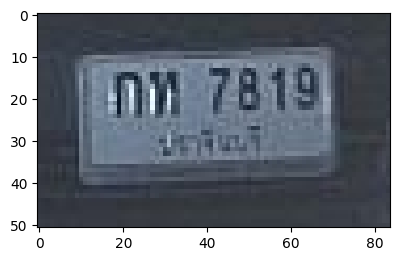


0: 416x640 1 1, 1 7, 1 8, 1 9, 1 ก, 1 เชียงใหม่, 19.1ms
Speed: 1.6ms preprocess, 19.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
[[65.16801452636719, 17.60086441040039, 11.39517593383789, 19.86005210876465], [42.312774658203125, 32.204097747802734, 35.57086181640625, 15.412332534790039], [57.75751876831055, 17.682220458984375, 9.543853759765625, 18.39455223083496], [50.63230514526367, 17.387544631958008, 10.890670776367188, 19.148326873779297], [20.241985321044922, 18.61053466796875, 15.085049629211426, 20.197071075439453], [43.05889892578125, 17.926942825317383, 10.37319564819336, 19.061500549316406]]
[9, 67, 1, 8, 10, 7]
0ก7819
/content/test/test/7af1137a-601f-4f8c-8173-64f82603da58.jpg
/content/test/test/7af1137a-601f-4f8c-8173-64f82603da58.jpg
/content/test/test/7af1137a-601f-4f8c-8173-64f82603da58.jpg 341 200 423 247


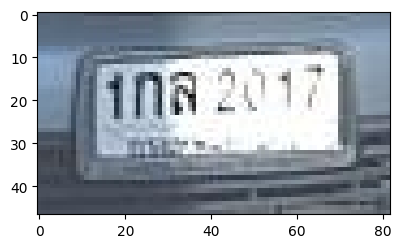


0: 384x640 2 1s, 1 2, 1 7, 1 ก, 1 ล, 22.1ms
Speed: 1.5ms preprocess, 22.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
[[44.02157974243164, 18.41210174560547, 10.921958923339844, 19.589454650878906], [17.776987075805664, 19.336212158203125, 12.134201049804688, 19.58099365234375], [58.72844314575195, 17.73496437072754, 10.009407043457031, 18.654869079589844], [26.23952865600586, 18.564279556274414, 12.699554443359375, 20.856807708740234], [65.556396484375, 17.19932746887207, 12.412528991699219, 21.17640495300293], [34.807373046875, 18.182247161865234, 12.706560134887695, 21.101015090942383]]
[2, 1, 1, 10, 7, 45]
01กล217
/content/test/test/27f1fac1-03b0-42c7-b74e-36d1dd3668ed.jpg
/content/test/test/27f1fac1-03b0-42c7-b74e-36d1dd3668ed.jpg
/content/test/test/27f1fac1-03b0-42c7-b74e-36d1dd3668ed.jpg 328 156 407 202


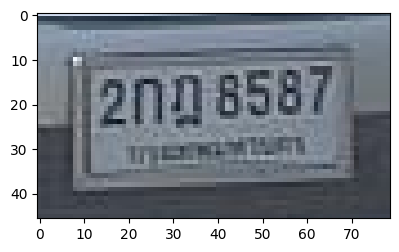


0: 384x640 1 2, 1 5, 1 8, 1 ก, 1 ฎ, 1 กรุงเทพมหานคร, 20.6ms
Speed: 1.9ms preprocess, 20.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[40.53804397583008, 31.38839340209961, 50.68199920654297, 13.73614501953125], [16.01982879638672, 19.101320266723633, 13.25866413116455, 20.951385498046875], [25.18429183959961, 18.80388069152832, 12.08209228515625, 20.874656677246094], [50.04450988769531, 16.940101623535156, 11.06781005859375, 20.07285499572754], [34.20861053466797, 18.73453140258789, 13.077152252197266, 22.178321838378906], [42.851043701171875, 17.925443649291992, 10.869220733642578, 19.706619262695312]]
[54, 2, 10, 5, 23, 8]
02กฎ85
/content/test/test/cfb3c23a-7de3-4d4f-9d33-0a559f29829c.jpg
/content/test/test/cfb3c23a-7de3-4d4f-9d33-0a559f29829c.jpg
/content/test/test/cfb3c23a-7de3-4d4f-9d33-0a559f29829c.jpg 318 189 395 237


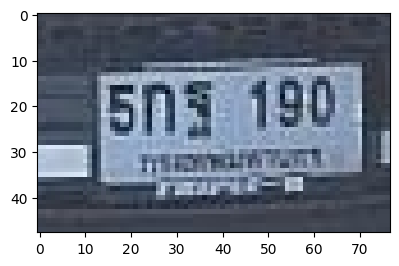


0: 416x640 1 0, 1 1, 1 5, 1 9, 1 ก, 1 ฐ, 1 กรุงเทพมหานคร, 20.1ms
Speed: 1.9ms preprocess, 20.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
[[62.60763168334961, 19.317968368530273, 11.387260437011719, 19.710365295410156], [48.594444274902344, 19.52218246459961, 10.496932983398438, 18.9141845703125], [36.18658447265625, 20.33918571472168, 12.864299774169922, 21.34095001220703], [42.3969841003418, 32.157527923583984, 49.266639709472656, 10.40948486328125], [55.67791748046875, 19.25772476196289, 9.701290130615234, 17.913135528564453], [17.139984130859375, 19.992374420166016, 15.10502815246582, 21.06072425842285], [26.805248260498047, 20.63532257080078, 13.024930953979492, 20.16158676147461]]
[0, 1, 25, 54, 9, 5, 10]
05กฐ190
/content/test/test/e4057602-004b-4eac-bf6b-5ec224a3a7c3.jpg
/content/test/test/e4057602-004b-4eac-bf6b-5ec224a3a7c3.jpg
/content/test/test/e4057602-004b-4eac-bf6b-5ec224a3a7c3.jpg 321 196 404 244


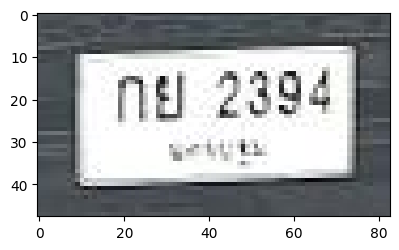


0: 384x640 1 2, 1 3, 1 4, 1 9, 1 ก, 20.6ms
Speed: 1.6ms preprocess, 20.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
[[52.60767364501953, 19.08465003967285, 9.99563217163086, 18.704097747802734], [44.77753448486328, 19.90933609008789, 11.284244537353516, 19.012928009033203], [21.542665481567383, 19.812965393066406, 14.818285942077637, 19.92980194091797], [68.66470336914062, 18.936296463012695, 12.894577026367188, 20.307788848876953], [59.94502639770508, 19.314300537109375, 10.618278503417969, 18.83148956298828]]
[3, 2, 10, 4, 9]
0ก2394
/content/test/test/8252f514-31b1-4c63-a097-76960b671dfd.jpg
/content/test/test/8252f514-31b1-4c63-a097-76960b671dfd.jpg
/content/test/test/8252f514-31b1-4c63-a097-76960b671dfd.jpg 312 188 388 229


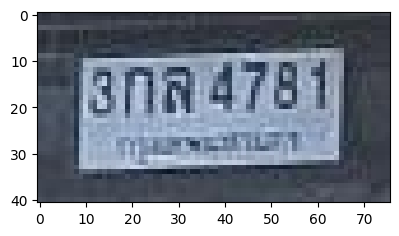


0: 352x640 1 1, 1 3, 1 4, 1 7, 1 8, 1 ก, 1 ล, 1 กรุงเทพมหานคร, 20.6ms
Speed: 1.4ms preprocess, 20.6ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)
[[30.8179874420166, 16.22690200805664, 11.965160369873047, 18.768535614013672], [13.257828712463379, 16.964340209960938, 11.336709976196289, 18.351669311523438], [61.678077697753906, 15.953044891357422, 10.178939819335938, 18.61121368408203], [46.81024932861328, 16.127437591552734, 9.25741958618164, 16.918760299682617], [40.2915153503418, 16.351539611816406, 9.775009155273438, 17.09868812561035], [36.93630599975586, 28.31191635131836, 48.63909149169922, 11.125541687011719], [53.88014221191406, 15.656988143920898, 10.28341293334961, 18.112266540527344], [21.72231101989746, 17.355037689208984, 10.932533264160156, 16.65852928161621]]
[45, 3, 1, 7, 4, 54, 8, 10]
03กล4781
/content/test/test/2f197151-535c-4f9c-8178-307d264f5ad9.jpg
/content/test/test/2f197151-535c-4f9c-8178-307d264f5ad9.jpg
/content/test/test/2f197151-535c-4f9

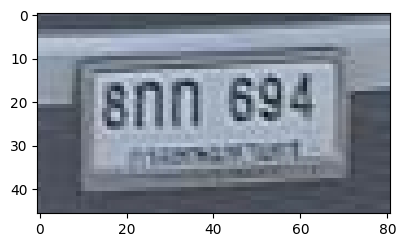


0: 384x640 1 4, 1 6, 1 8, 1 9, 2 กs, 1 กรุงเทพมหานคร, 20.2ms
Speed: 2.1ms preprocess, 20.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[25.599285125732422, 20.551822662353516, 11.715866088867188, 19.86931610107422], [54.43440246582031, 19.542827606201172, 10.397537231445312, 19.7689208984375], [46.82497787475586, 19.291107177734375, 12.081436157226562, 20.35968017578125], [41.179866790771484, 32.97188186645508, 50.980140686035156, 12.238943099975586], [16.659887313842773, 20.777568817138672, 13.186020851135254, 20.276161193847656], [62.93395233154297, 18.878131866455078, 13.506088256835938, 21.032520294189453], [34.84223937988281, 20.16237449645996, 12.784385681152344, 19.745952606201172]]
[10, 9, 6, 54, 8, 4, 10]
08กก694
/content/test/test/59452233-65bb-4479-8d7f-4ded2e887334.jpg
/content/test/test/59452233-65bb-4479-8d7f-4ded2e887334.jpg
/content/test/test/59452233-65bb-4479-8d7f-4ded2e887334.jpg 315 207 391 250


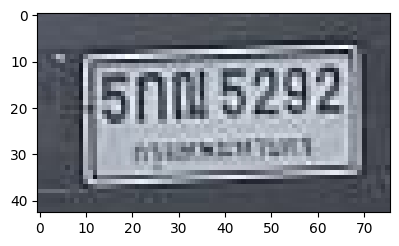


0: 384x640 2 2s, 2 5s, 1 9, 1 ก, 1 ณ, 1 กรุงเทพมหานคร, 19.3ms
Speed: 1.6ms preprocess, 19.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[56.519874572753906, 17.108478546142578, 9.652900695800781, 17.5989933013916], [15.837047576904297, 17.261550903320312, 13.054756164550781, 20.920207977294922], [64.00336456298828, 16.873146057128906, 12.13589859008789, 19.33292579650879], [49.58123779296875, 17.301441192626953, 10.43912124633789, 17.9925594329834], [24.580585479736328, 18.030729293823242, 11.121599197387695, 19.267688751220703], [42.236228942871094, 16.72408103942871, 10.67605972290039, 17.87115478515625], [40.25868606567383, 30.007705688476562, 48.14508819580078, 12.638809204101562], [33.43531036376953, 17.156879425048828, 13.01252555847168, 18.823444366455078]]
[9, 5, 2, 2, 10, 5, 54, 28]
05กณ5292
/content/test/test/02fb160d-5418-4ece-beba-b2a8f1b8c453.jpg
/content/test/test/02fb160d-5418-4ece-beba-b2a8f1b8c453.jpg
/content/test/test/02fb160d-5418-4ece-beba-

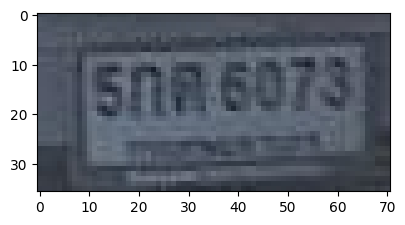


0: 352x640 1 3, 1 5, 1 6, 1 7, 1 ก, 1 ฒ, 1 กรุงเทพมหานคร, 20.2ms
Speed: 1.9ms preprocess, 20.2ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)
[[60.43836212158203, 13.303932189941406, 9.854938507080078, 16.422138214111328], [21.60846710205078, 14.853321075439453, 10.39603042602539, 16.806949615478516], [30.444074630737305, 14.568703651428223, 11.15945816040039, 16.627607345581055], [38.864383697509766, 13.9409818649292, 8.554161071777344, 16.602590560913086], [13.008399963378906, 14.351595878601074, 11.398094177246094, 17.922998428344727], [37.32868194580078, 26.804271697998047, 46.604434967041016, 9.492326736450195], [52.68873596191406, 14.058470726013184, 9.31325912475586, 16.614839553833008]]
[3, 10, 27, 6, 5, 54, 7]
05กฒ673
/content/test/test/b93ee284-6e8a-4869-93b5-4b22a34a18a6.jpg
/content/test/test/b93ee284-6e8a-4869-93b5-4b22a34a18a6.jpg
/content/test/test/b93ee284-6e8a-4869-93b5-4b22a34a18a6.jpg 352 211 437 256


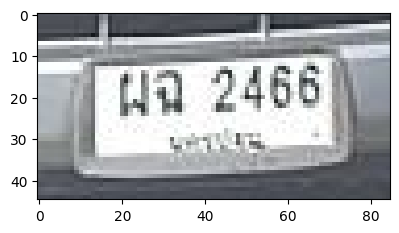


0: 352x640 1 2, 1 4, 2 6s, 1 ฉ, 1 ผ, 19.2ms
Speed: 1.9ms preprocess, 19.2ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)
[[33.16019821166992, 18.008045196533203, 13.165077209472656, 20.584943771362305], [45.23468017578125, 19.024290084838867, 12.020870208740234, 19.364200592041016], [59.140716552734375, 17.843534469604492, 10.7359619140625, 21.62448501586914], [52.87342834472656, 18.017385482788086, 10.72153091430664, 20.848026275634766], [23.020477294921875, 18.71910858154297, 15.514261245727539, 21.124523162841797], [66.71109008789062, 17.54790687561035, 13.016212463378906, 21.364086151123047]]
[18, 2, 6, 4, 37, 6]
0ผฉ2466
/content/test/test/102f515c-5395-49af-b951-27f71472ed89.jpg
/content/test/test/102f515c-5395-49af-b951-27f71472ed89.jpg
/content/test/test/102f515c-5395-49af-b951-27f71472ed89.jpg 316 202 393 248


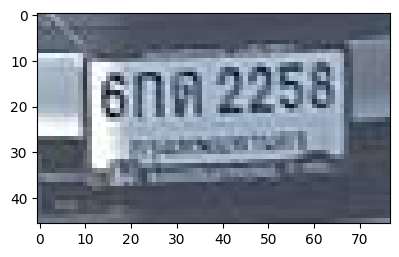


0: 384x640 2 2s, 1 5, 1 6, 1 8, 1 ก, 1 กรุงเทพมหานคร, 21.5ms
Speed: 1.8ms preprocess, 21.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[49.42973327636719, 16.508426666259766, 10.324565887451172, 18.100088119506836], [41.88233947753906, 16.994205474853516, 10.43587875366211, 17.91109275817871], [55.66486358642578, 15.332633972167969, 10.491241455078125, 18.691722869873047], [16.006126403808594, 17.47463607788086, 12.097749710083008, 18.931964874267578], [39.600040435791016, 28.843412399291992, 49.651466369628906, 10.929119110107422], [62.94586181640625, 15.616691589355469, 11.634258270263672, 18.964458465576172], [24.186668395996094, 17.317873001098633, 11.151147842407227, 17.893882751464844]]
[2, 2, 5, 6, 54, 8, 10]
06ก2258
/content/test/test/456b8d93-5677-4814-9a92-82ebb61f7ed4.jpg
/content/test/test/456b8d93-5677-4814-9a92-82ebb61f7ed4.jpg
/content/test/test/456b8d93-5677-4814-9a92-82ebb61f7ed4.jpg 332 190 411 237


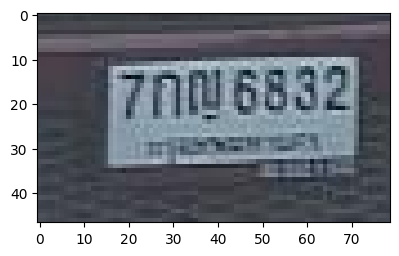


0: 384x640 1 2, 1 3, 1 6, 1 7, 1 8, 1 ก, 1 ญ, 1 กรุงเทพมหานคร, 19.2ms
Speed: 1.9ms preprocess, 19.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[60.659488677978516, 17.265335083007812, 10.367256164550781, 18.51209259033203], [37.80341720581055, 17.528034210205078, 14.5750732421875, 19.645843505859375], [67.82015991210938, 16.93276596069336, 11.415016174316406, 17.92930030822754], [21.03221893310547, 18.289966583251953, 11.996267318725586, 19.242525100708008], [46.69428253173828, 17.20607566833496, 10.499645233154297, 18.665145874023438], [28.932241439819336, 18.07109260559082, 11.364337921142578, 18.60112762451172], [53.78173065185547, 17.229124069213867, 10.75655746459961, 18.204097747802734], [44.1264762878418, 29.403072357177734, 50.63105010986328, 11.200172424316406]]
[3, 22, 2, 7, 6, 10, 8, 54]
07กญ6832
/content/test/test/e3abbbee-3587-4745-b7df-a62b2d136b5f.jpg
/content/test/test/e3abbbee-3587-4745-b7df-a62b2d136b5f.jpg
/content/test/test/e3abbbee-3587-47

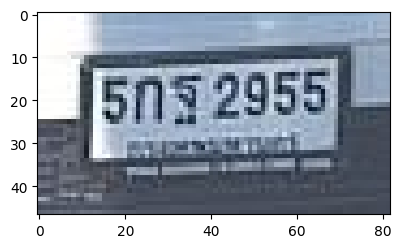


0: 384x640 1 2, 3 5s, 1 9, 1 ก, 1 ฐ, 1 กรุงเทพมหานคร, 23.4ms
Speed: 1.8ms preprocess, 23.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[[44.06159210205078, 19.72971534729004, 12.270557403564453, 19.445026397705078], [51.70746994018555, 19.350440979003906, 10.83935546875, 18.593259811401367], [65.9596939086914, 18.000247955322266, 13.077579498291016, 20.62629508972168], [17.50518798828125, 19.664695739746094, 12.897454261779785, 19.867958068847656], [58.43405532836914, 17.993019104003906, 11.099578857421875, 19.425434112548828], [26.42887306213379, 19.687938690185547, 12.866214752197266, 19.9392032623291], [35.348854064941406, 19.513032913208008, 13.172412872314453, 21.147804260253906], [40.751956939697266, 31.729660034179688, 51.05858612060547, 12.418420791625977]]
[2, 9, 5, 5, 5, 10, 25, 54]
05กฐ2955
/content/test/test/7b307a94-8eb5-4130-a2ff-661cdb5b493f.jpg
/content/test/test/7b307a94-8eb5-4130-a2ff-661cdb5b493f.jpg
/content/test/test/7b307a94-8eb5-4130-a2ff-

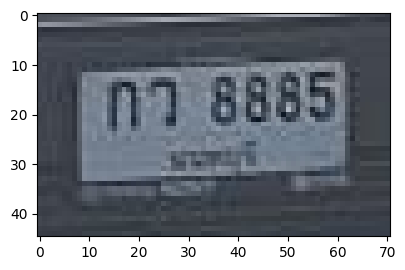


0: 416x640 1 5, 3 8s, 1 ก, 1 เชียงใหม่, 20.9ms
Speed: 1.8ms preprocess, 20.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
[[58.20298385620117, 16.998294830322266, 11.957740783691406, 19.72747230529785], [50.96844482421875, 17.089664459228516, 9.591300964355469, 17.588533401489258], [44.3320426940918, 17.020442962646484, 9.140739440917969, 17.00908088684082], [37.35486602783203, 17.517017364501953, 10.353008270263672, 18.144550323486328], [16.852283477783203, 17.736013412475586, 13.438371658325195, 18.812843322753906], [35.6688232421875, 29.628013610839844, 26.5164737701416, 10.558347702026367]]
[5, 8, 8, 8, 10, 67]
0ก8885
/content/test/test/6fb80e6f-7043-44d6-87bf-0458938a3717.jpg
/content/test/test/6fb80e6f-7043-44d6-87bf-0458938a3717.jpg
/content/test/test/6fb80e6f-7043-44d6-87bf-0458938a3717.jpg 310 187 389 235


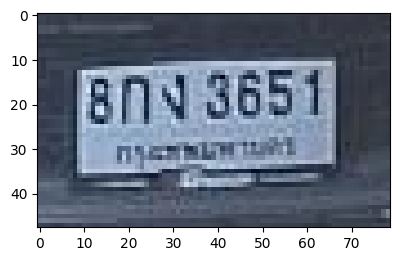


0: 416x640 1 1, 1 3, 1 5, 1 6, 1 8, 1 ก, 1 ง, 1 กรุงเทพมหานคร, 19.9ms
Speed: 2.3ms preprocess, 19.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
[[40.35205078125, 18.7239990234375, 10.47967529296875, 17.86971092224121], [62.84385299682617, 18.38820457458496, 10.446159362792969, 17.791149139404297], [22.509811401367188, 19.293622970581055, 12.146440505981445, 18.968585968017578], [13.70873737335205, 18.91520881652832, 11.637224197387695, 19.132938385009766], [31.54195785522461, 18.39232635498047, 10.84185791015625, 17.69644546508789], [47.54893493652344, 17.65921401977539, 9.988945007324219, 18.72895050048828], [38.16438293457031, 30.519180297851562, 50.242393493652344, 11.127275466918945], [54.84830856323242, 17.13653564453125, 10.553726196289062, 18.771337509155273]]
[3, 1, 10, 8, 16, 6, 54, 5]
08กง3651
/content/test/test/4cc36e35-c90f-4568-a08f-392db35f4209.jpg
/content/test/test/4cc36e35-c90f-4568-a08f-392db35f4209.jpg
/content/test/test/4cc36e35-c90f-4568-a08

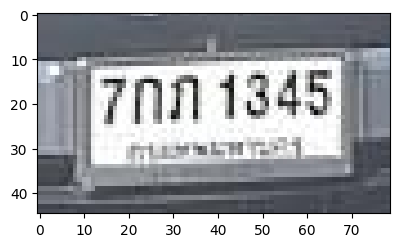


0: 384x640 1 1, 1 3, 1 5, 1 7, 1 ก, 1 ภ, 1 กรุงเทพมหานคร, 20.0ms
Speed: 2.0ms preprocess, 20.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[49.988433837890625, 18.43825912475586, 10.277935028076172, 18.32286262512207], [43.51886749267578, 18.607534408569336, 9.681766510009766, 19.100181579589844], [40.200706481933594, 31.189041137695312, 49.3354377746582, 13.172088623046875], [16.882627487182617, 19.26559066772461, 12.080025672912598, 20.985733032226562], [63.951751708984375, 17.479883193969727, 11.937938690185547, 20.41793441772461], [24.721403121948242, 19.19654655456543, 12.039409637451172, 19.381210327148438], [34.245025634765625, 19.0102481842041, 13.849260330200195, 20.46916961669922]]
[3, 1, 54, 7, 5, 10, 41]
07กภ135
/content/test/test/40c4ab27-00f4-4c03-bae0-3825cc2ac435.jpg
/content/test/test/40c4ab27-00f4-4c03-bae0-3825cc2ac435.jpg
/content/test/test/40c4ab27-00f4-4c03-bae0-3825cc2ac435.jpg 263 199 342 246


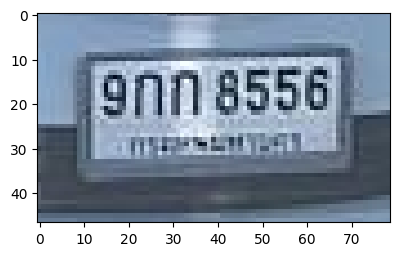


0: 384x640 2 5s, 1 6, 1 8, 1 9, 2 กs, 1 กรุงเทพมหานคร, 19.5ms
Speed: 1.8ms preprocess, 19.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[25.242786407470703, 17.664531707763672, 11.33596420288086, 19.34437370300293], [16.65475082397461, 17.84123420715332, 12.7384033203125, 19.208168029785156], [42.656349182128906, 17.12282371520996, 10.61568832397461, 19.33134651184082], [49.730934143066406, 17.27614402770996, 10.689674377441406, 18.338871002197266], [56.34770965576172, 16.810022354125977, 10.586009979248047, 18.05951499938965], [33.75150680541992, 17.430147171020508, 11.847702026367188, 19.210243225097656], [63.755348205566406, 16.622243881225586, 12.15291976928711, 20.228620529174805], [40.09055709838867, 30.143482208251953, 50.32146072387695, 13.937026977539062]]
[10, 9, 8, 5, 5, 10, 6, 54]
09กก8556
/content/test/test/f2f32c38-7c43-4ca7-9cb7-bfc7ee582feb.jpg
/content/test/test/f2f32c38-7c43-4ca7-9cb7-bfc7ee582feb.jpg
/content/test/test/f2f32c38-7c43-4ca7-9cb7

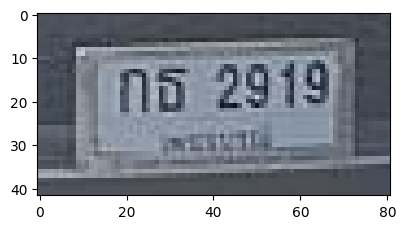


0: 352x640 1 1, 1 2, 2 9s, 1 ก, 1 ธ, 1 เชียงใหม่, 21.8ms
Speed: 1.7ms preprocess, 21.8ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)
[[41.75208282470703, 29.79175567626953, 34.228939056396484, 12.648233413696289], [51.30712890625, 16.305755615234375, 9.96639633178711, 18.56609535217285], [58.14866638183594, 16.22300148010254, 9.017448425292969, 17.975242614746094], [31.853782653808594, 16.763874053955078, 14.033563613891602, 21.300626754760742], [21.697479248046875, 16.959720611572266, 13.168088912963867, 18.777647018432617], [43.99519348144531, 17.053810119628906, 11.976425170898438, 19.477495193481445], [65.34129333496094, 16.06842041015625, 10.83212661743164, 18.750633239746094]]
[67, 9, 1, 33, 10, 2, 9]
0กธ2919
/content/test/test/da0007ea-cb9f-4866-8a8f-3a38bc3f9fe5.jpg
/content/test/test/da0007ea-cb9f-4866-8a8f-3a38bc3f9fe5.jpg
/content/test/test/da0007ea-cb9f-4866-8a8f-3a38bc3f9fe5.jpg 318 196 399 244


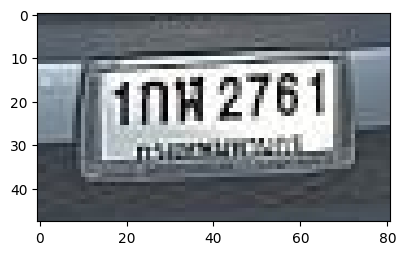


0: 384x640 2 1s, 1 2, 1 6, 1 7, 1 ก, 1 ฬ, 1 กรุงเทพมหานคร, 21.6ms
Speed: 1.8ms preprocess, 21.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[[35.74616241455078, 19.966264724731445, 11.814390182495117, 18.018157958984375], [65.74752807617188, 18.673629760742188, 11.300151824951172, 19.613697052001953], [19.562511444091797, 20.930509567260742, 9.969038963317871, 17.708961486816406], [57.753482818603516, 18.26173210144043, 10.471176147460938, 19.13658905029297], [26.975357055664062, 20.518138885498047, 11.422323226928711, 18.44239044189453], [51.0636100769043, 19.209199905395508, 9.889724731445312, 19.237621307373047], [44.38462829589844, 20.175613403320312, 10.451183319091797, 19.36115837097168], [42.031219482421875, 32.24520492553711, 48.428863525390625, 14.308549880981445]]
[51, 1, 1, 6, 10, 7, 2, 54]
01กฬ2761
/content/test/test/071a9155-b59d-4268-9cae-90919205e96c.jpg
/content/test/test/071a9155-b59d-4268-9cae-90919205e96c.jpg
/content/test/test/071a9155-b59d-4

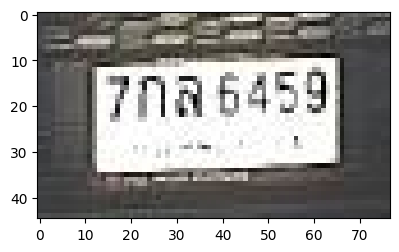


0: 384x640 1 4, 1 5, 1 6, 1 7, 1 9, 1 ก, 1 ล, 19.8ms
Speed: 2.0ms preprocess, 19.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
[[25.280494689941406, 18.500873565673828, 11.34075927734375, 18.107860565185547], [54.98493194580078, 16.83789825439453, 10.16324234008789, 17.53057098388672], [17.042659759521484, 18.56615447998047, 12.071222305297852, 18.774965286254883], [33.480934143066406, 17.87533950805664, 11.654451370239258, 18.480649948120117], [62.02632141113281, 17.586593627929688, 10.713199615478516, 18.84992218017578], [49.1123046875, 17.014835357666016, 9.50189208984375, 16.834665298461914], [41.94373321533203, 17.369125366210938, 10.05385971069336, 18.385986328125]]
[10, 5, 7, 45, 9, 4, 6]
07กล6459
/content/test/test/63b2eb64-8b46-4f1b-95a3-96d8cda81707.jpg
/content/test/test/63b2eb64-8b46-4f1b-95a3-96d8cda81707.jpg
/content/test/test/63b2eb64-8b46-4f1b-95a3-96d8cda81707.jpg 343 210 420 252


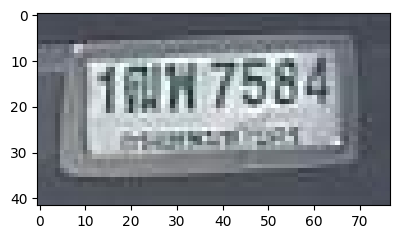


0: 352x640 1 1, 1 4, 1 5, 1 8, 1 ฒ, 1 พ, 1 กรุงเทพมหานคร, 19.6ms
Speed: 1.3ms preprocess, 19.6ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)
[[23.134559631347656, 15.900901794433594, 13.200475692749023, 18.140270233154297], [15.483064651489258, 16.70195770263672, 10.500190734863281, 17.627029418945312], [47.48973846435547, 15.15162467956543, 10.492828369140625, 18.32028579711914], [62.335567474365234, 14.969226837158203, 11.247276306152344, 19.41645050048828], [31.6231689453125, 15.642936706542969, 11.056428909301758, 18.639015197753906], [54.56261444091797, 15.087898254394531, 10.907855987548828, 18.40406036376953], [38.302879333496094, 28.036006927490234, 49.448787689208984, 12.743967056274414]]
[27, 1, 5, 4, 39, 8, 54]
01ฒพ584


In [91]:
for idx,row in df[:100].iterrows():
    id = idx
    img_name = "/content/test/test/"+test_df.iloc[id].values[0]+".jpg"
    print(img_name)
    # img = cv2.imread(img_name)
    img = plt.imread(img_name)
    print(img_name)
    x1 = int(test_df.iloc[id].values[1])-8
    y1 = int(test_df.iloc[id].values[2])-8
    x2 = int(test_df.iloc[id].values[3])+8
    y2 = int(test_df.iloc[id].values[4])+8
    print(f"{img_name} {x1} {y1} {x2} {y2}")
    imgcroped = img[y1:y2,x1:x2]

    # # Scale the image by a factor of 2 along both axes
    # scaled_image = cv2.resize(imgcroped, None, fx=3, fy=3)
    # # Remove noise using a Gaussian filter
    # filtered_image2 = cv2.GaussianBlur(scaled_image, (5,5), 0)
    # # Create the sharpening kernel
    # kernel = np.array([[0, -1, 0],
    #                 [-1, 5, -1],
    #                 [0, -1, 0]])

    # # Sharpen the image
    # sharpened_image = cv2.filter2D(filtered_image2, -1, kernel)
    # sharpened_image = cv2.filter2D(sharpened_image, -1, kernel)

    plt.figure(figsize=(10,8))
    plt.subplot(121)
    plt.imshow(imgcroped)
    # plt.subplot(122)
    # plt.imshow(sharpened_image)
    plt.show()

    results  = model(source = imgcroped,
                        conf=0.35)   # Predict image by image
    for result in results:
        if result.boxes:
            boxes  = result.boxes.xywh.tolist()    # Tensor งงๆ -> [[x1,y1,z1,a1],[x2,y2,z2,a2],...[xn,yn,zn,an]]
            clases = [int(cls) for cls in result.boxes.cls.tolist()]    # [float] -> [int]
            print(boxes)
            print(clases)
            bc = []
            for b,c in zip(boxes,clases):     # keep class and box postion in {}
                bc.append([c,b[0]])
            ls = sorted(bc,key=itemgetter(1))
            q = [i[0] for i in ls]
            result = convert2label(q)
            print(result)

In [76]:
from operator import itemgetter
ls = sorted(bc,key=itemgetter(1))
q = [i[0] for i in ls]
convert2label(q)

'0ฬ006ธ7774'